# Figs for Paper

## Contact Matrices

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import numpy as np
plt.rcParams.update({'font.size': 36}) 








New Dataset 










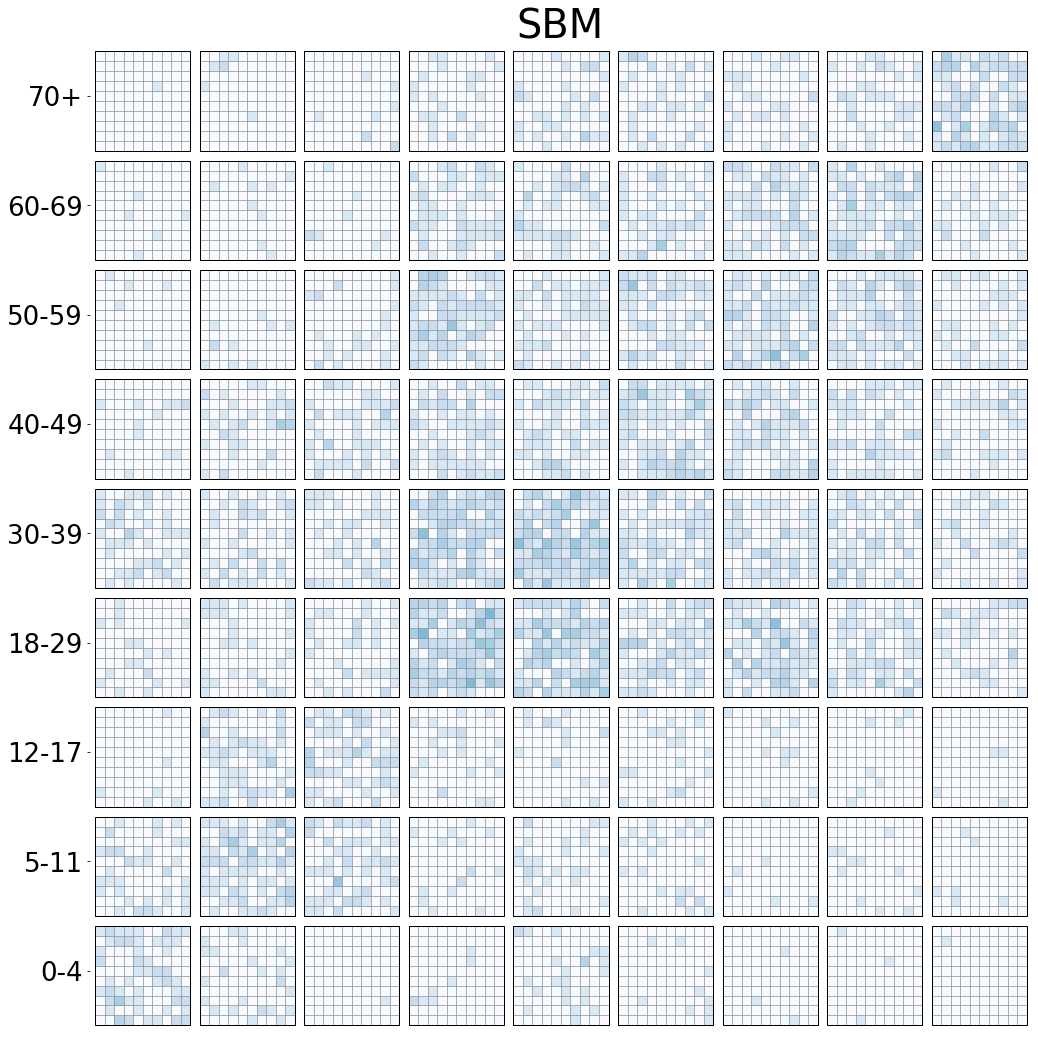

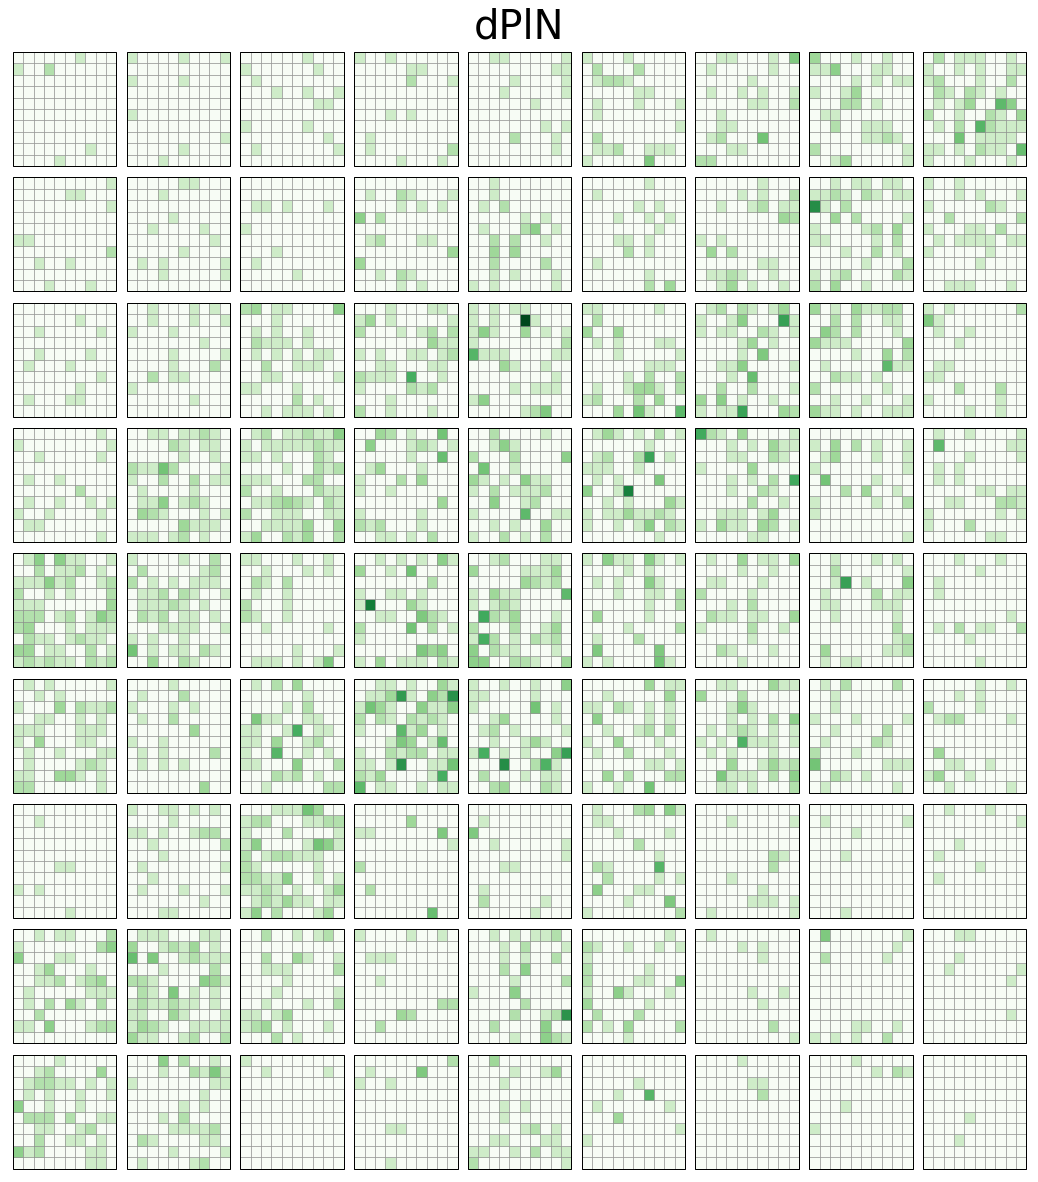

comix1 data: 5.215791541181092


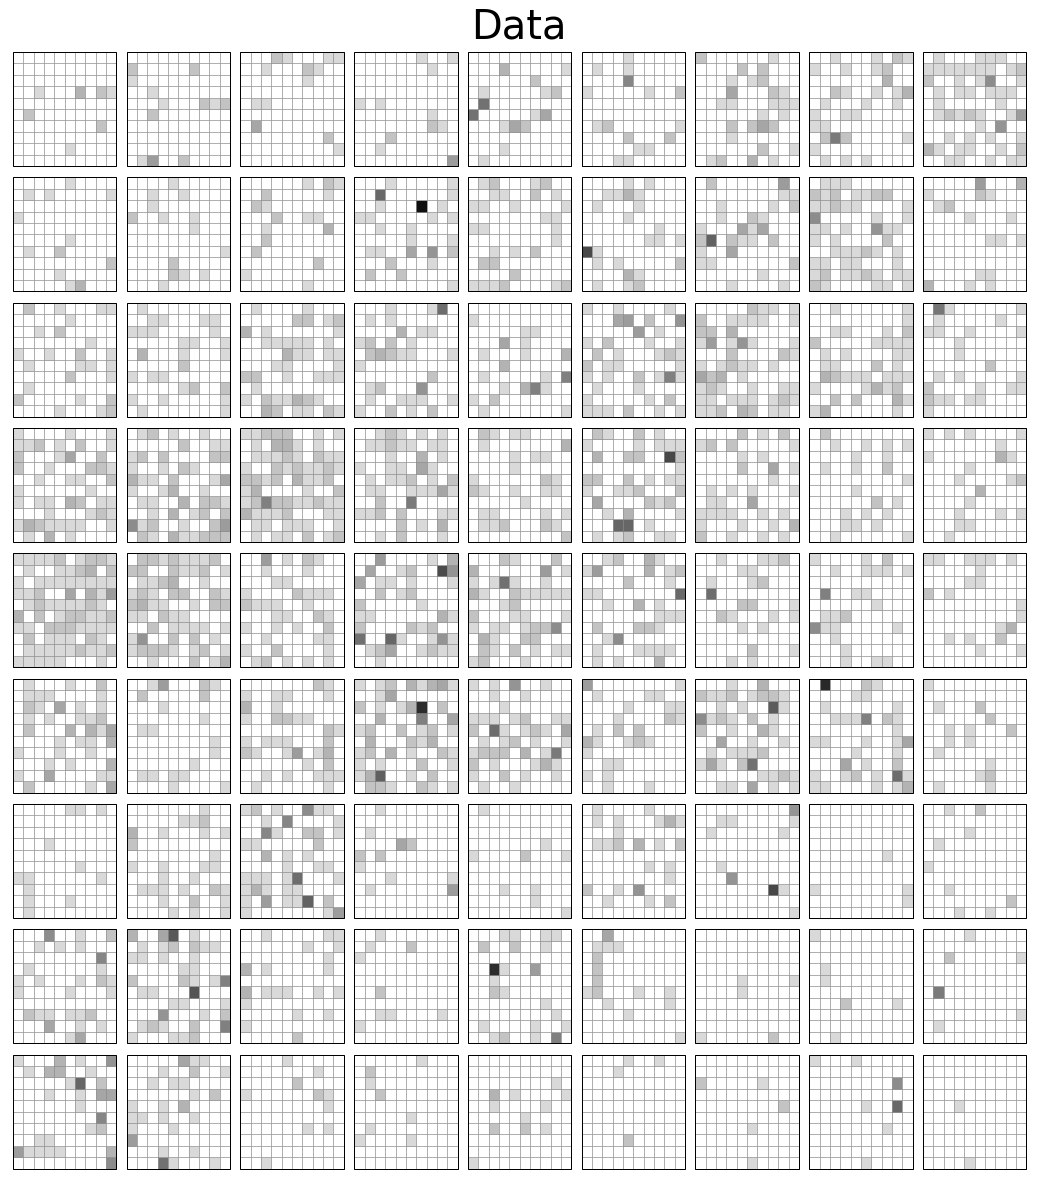








New Dataset 










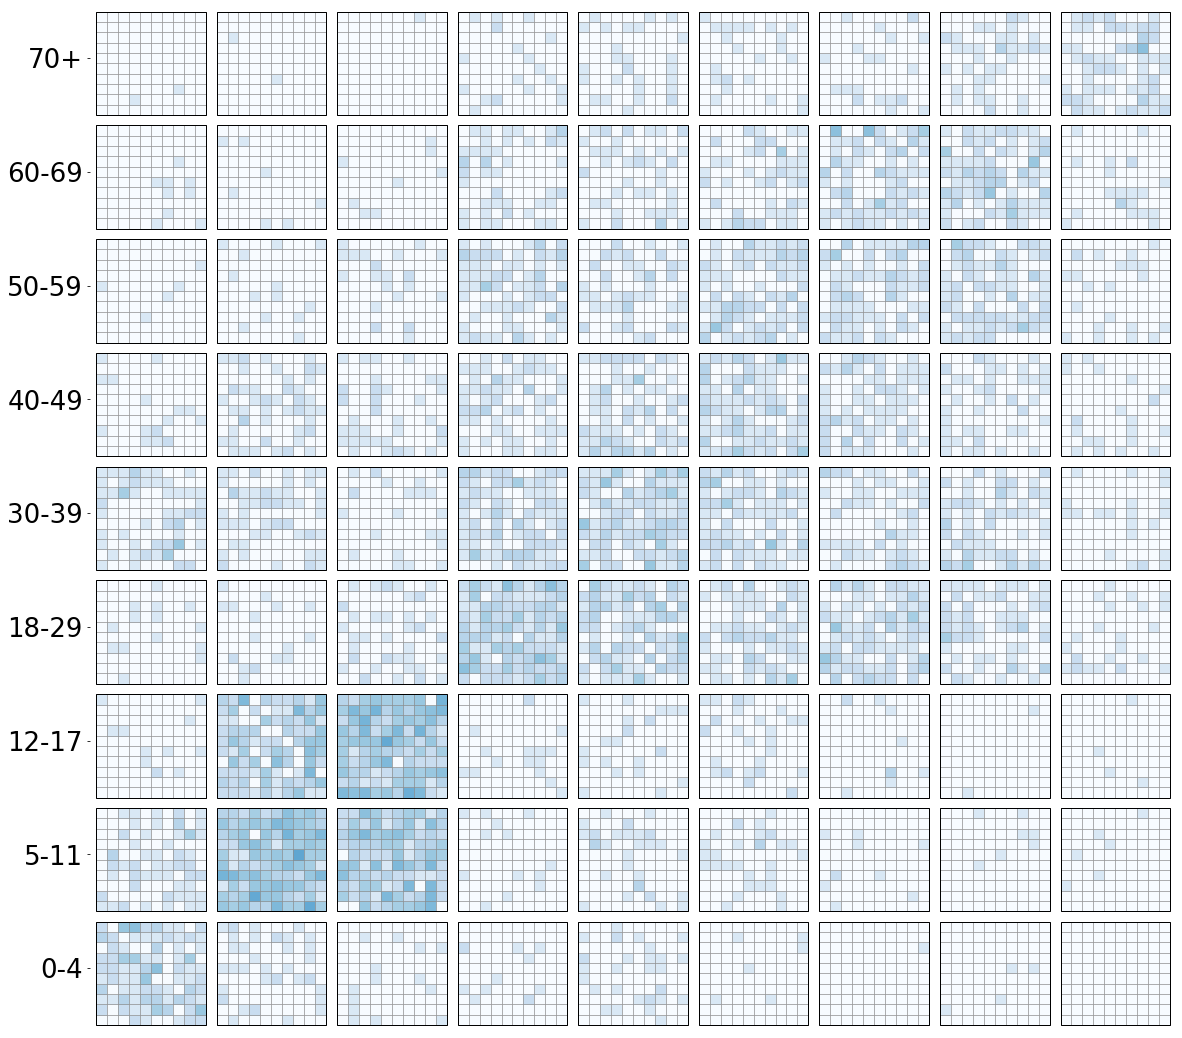

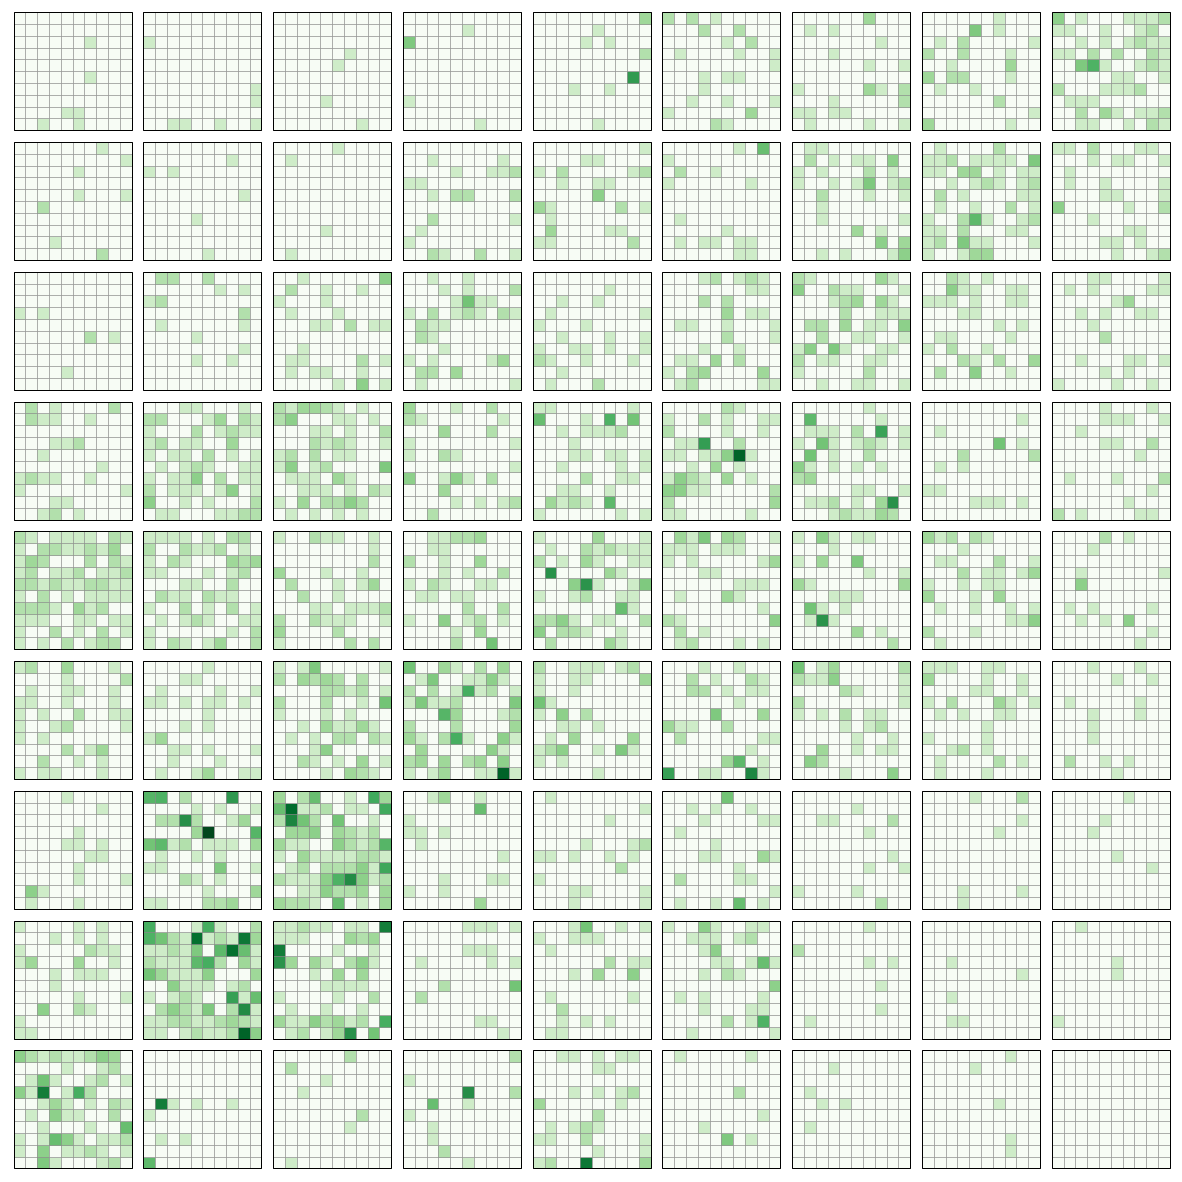

comix2 data: 6.75977577867185


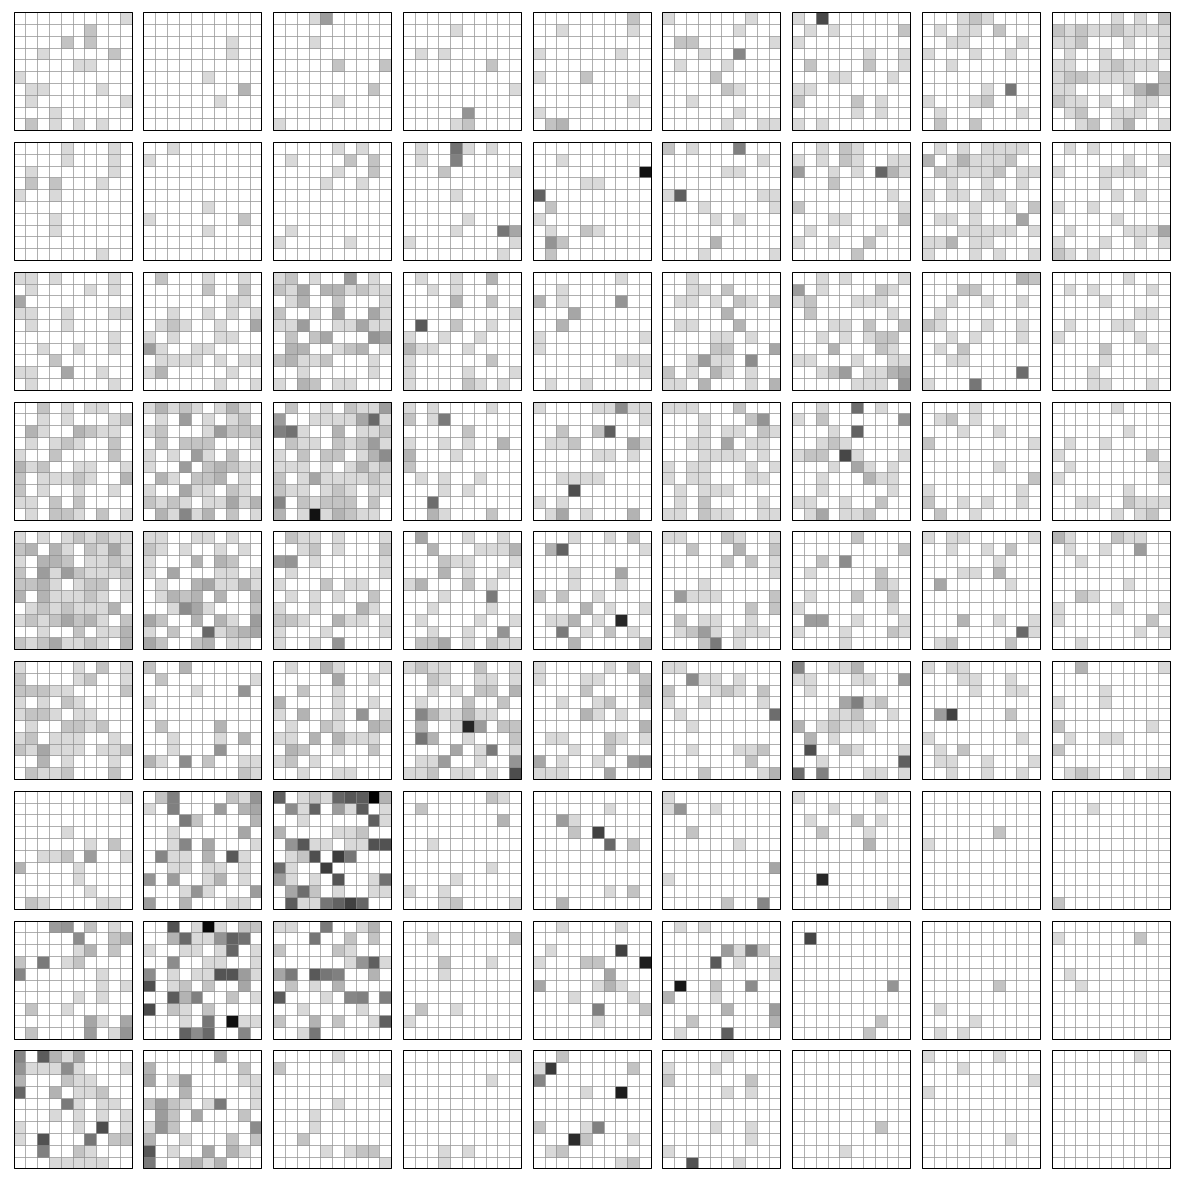








New Dataset 










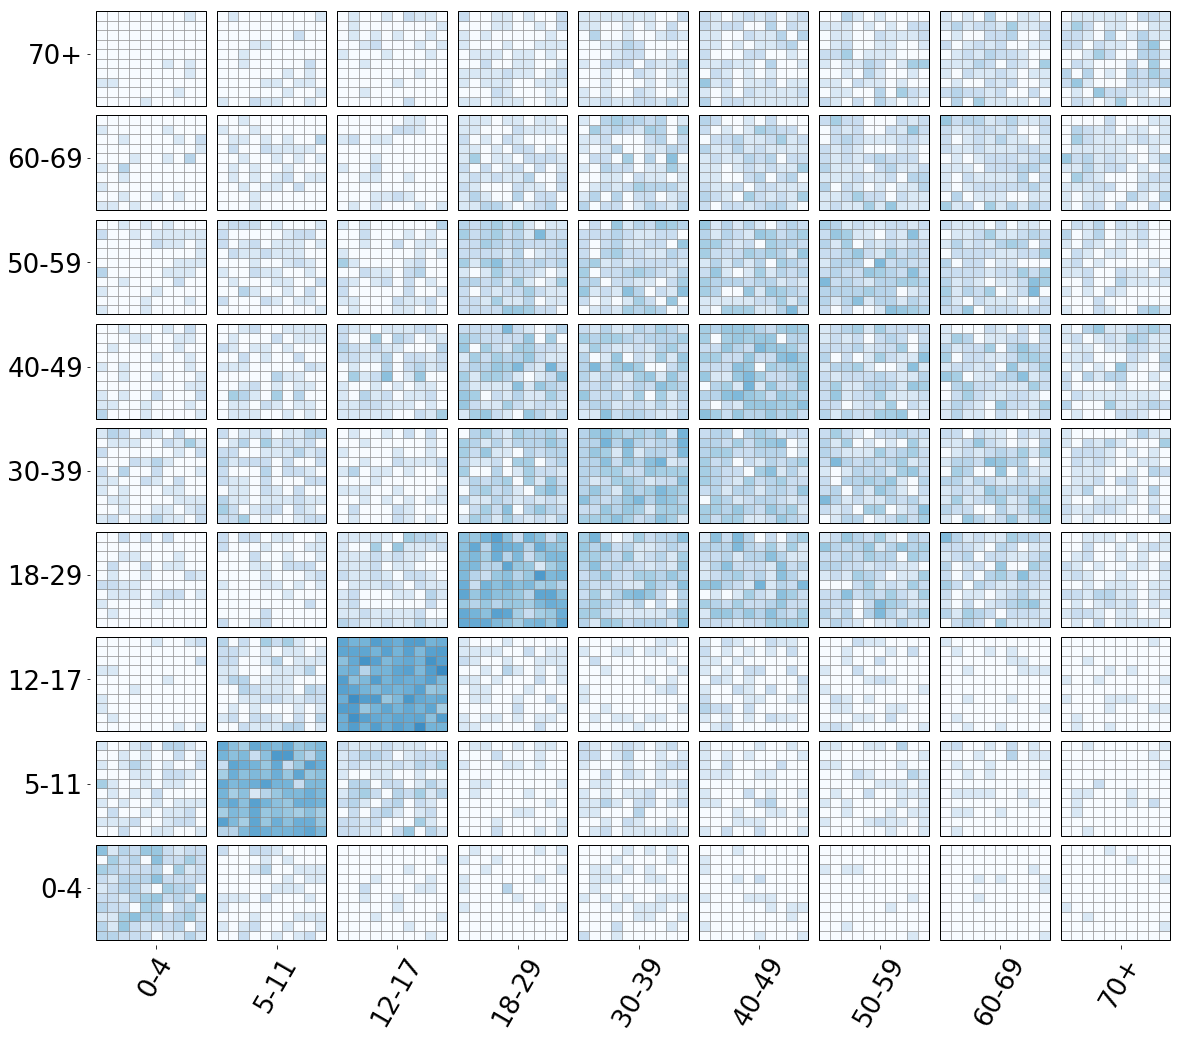

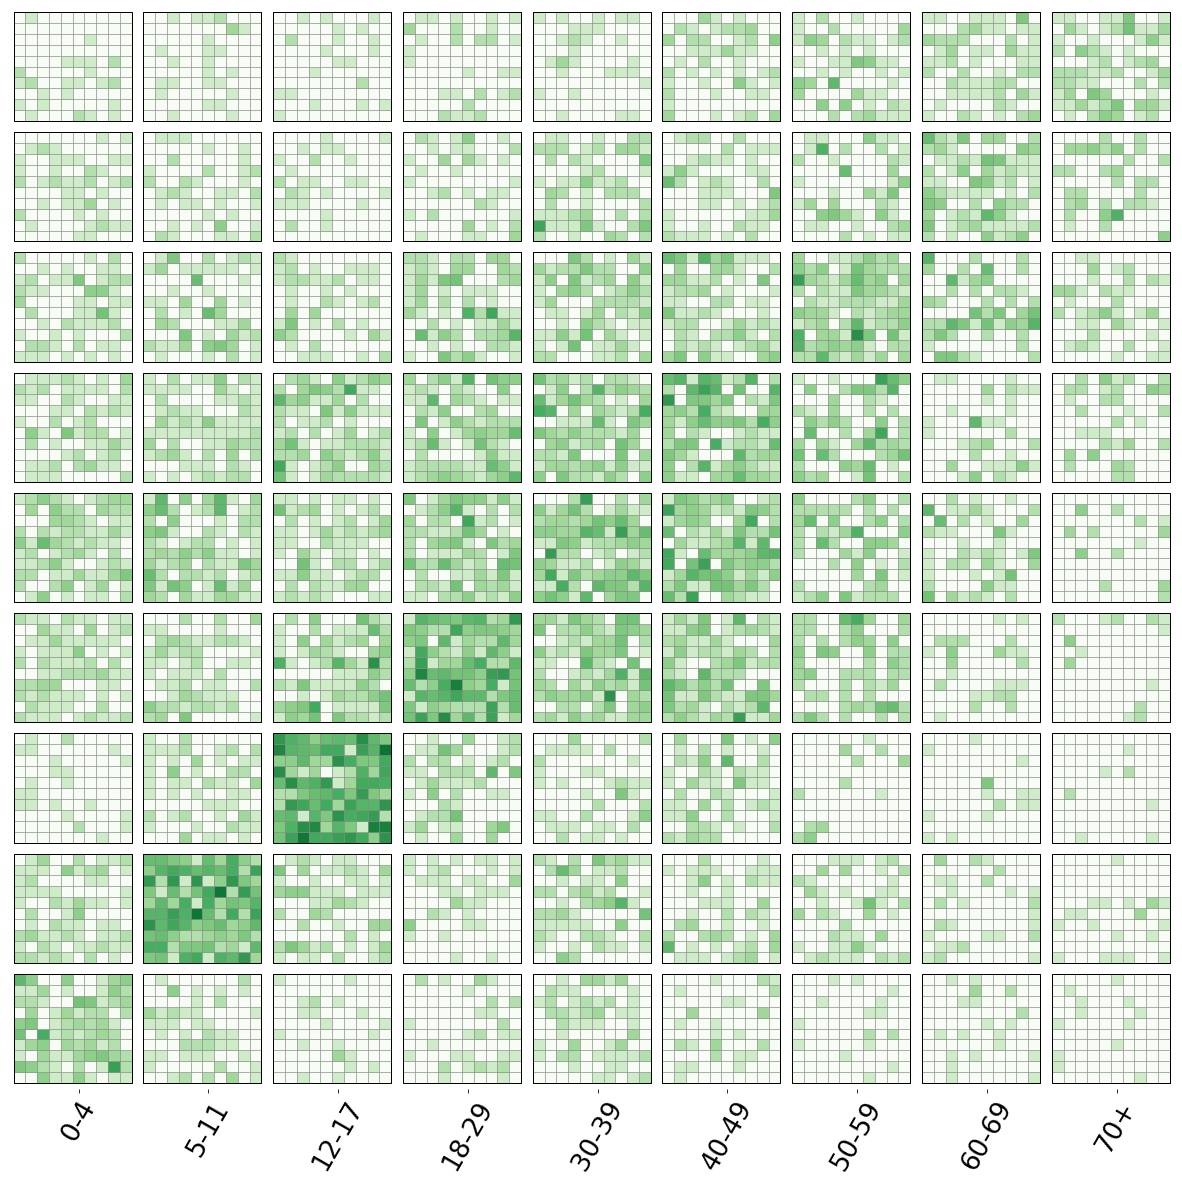

poly data: 13.470400665465132


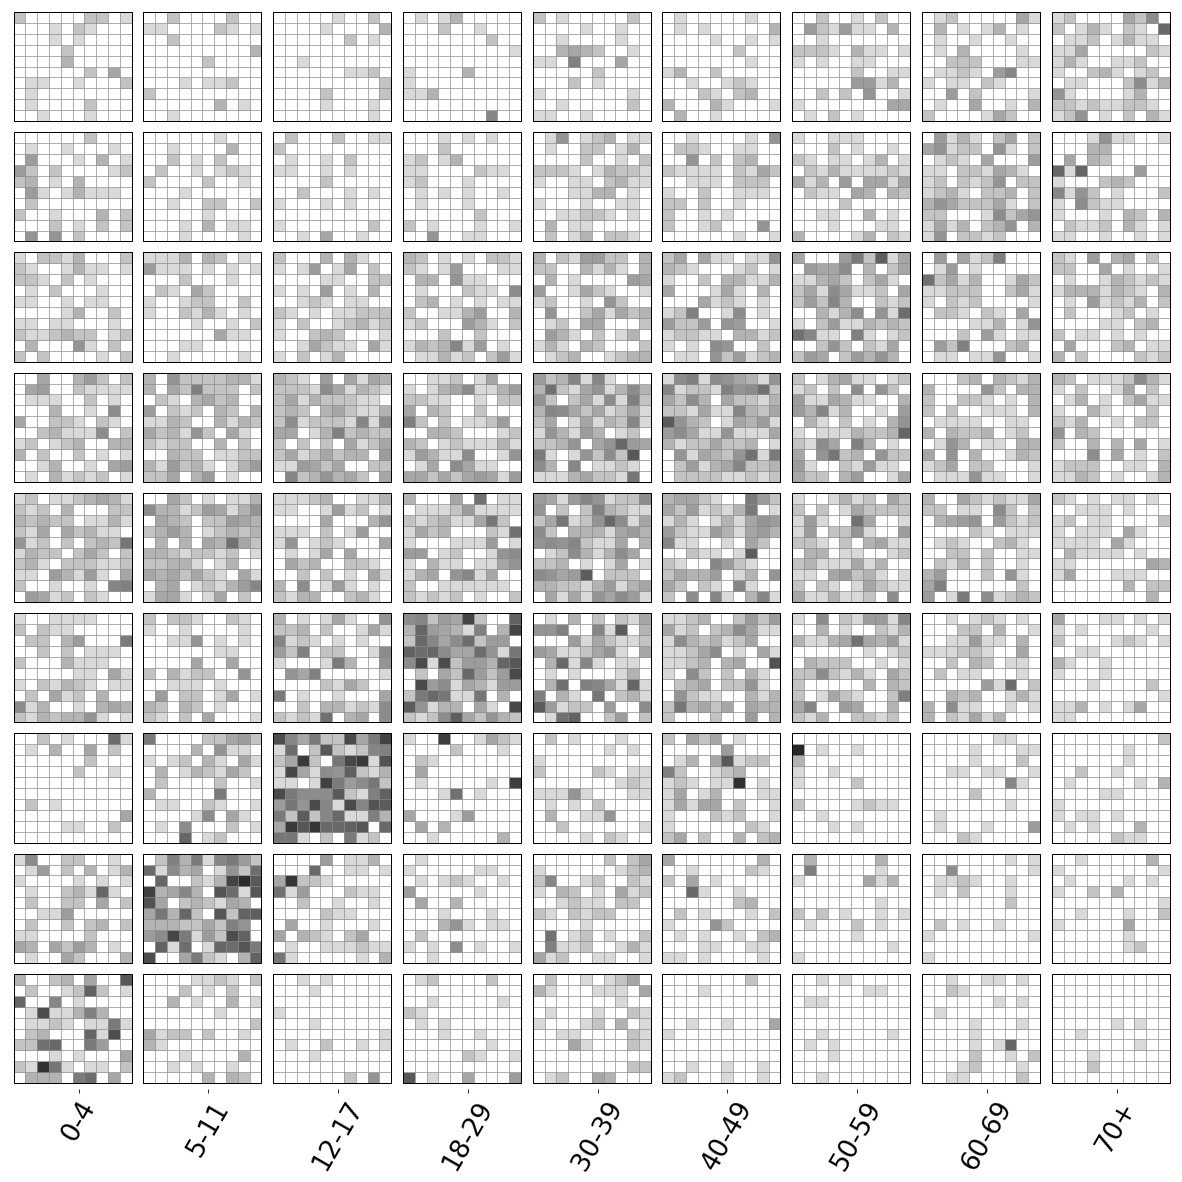

In [12]:
datas = ['CoMix_p1', 'CoMix_p2', 'polymod_df']
data_titles = ['CoMix 1', 'CoMix 2', 'POLYMOD']
egos = ['comix1', 'comix2', 'poly']
models = ['sbm','dpln', 'data']
model_names = ['SBM', 'dPlN', 'Data']

num_rows, epsilon = 9, 1e-1
width = 1/(num_rows+epsilon*num_rows)
num_small = 10
max_degree = 100
n = 100_000
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]
num_samples = num_small**2
cmap_grey = plt.get_cmap('Greys')
inside_g, outside_g = 0.1,0.5

for data_idx, data in enumerate(egos):
    print(f'\n\n\n\n\n\n\nNew Dataset \n\n\n\n\n\n\n\n')
    for model_idx, model in enumerate(models): 
        
        if model =='data':
            with open(f'input_data/egos/egos_{egos[data_idx]}.json') as f:
                ego_networks = json.load(f)
            print(f'{data} {model}: {np.mean([a["degree"] for a in ego_networks])}')
            ## count the partitions of data set
            data_partitions = np.zeros(len(partitions))
            for ego in ego_networks:
                data_partitions[ego['age']] += 1
            # make cumulative
            data_partitions = np.cumsum(data_partitions)
            # randomly sample in partitions
            samples = np.zeros((len(partitions), len(partitions), num_samples))
            for i, top in enumerate(data_partitions):
                for j, _ in enumerate(data_partitions):
                    if i == 0:    
                        indices = np.random.randint(0, top, size=num_samples)
                    else:
                        indices = np.random.randint(data_partitions[i-1], top, size=num_samples)
                    for k, idx in enumerate(indices):
                        # print(f'shape: {np.shape(samples)} \ni: {i}\nj: {j}\nk: {k}\n idx: {idx}\nlen(egos): {len(ego_networks)}\n {len(ego_networks[idx]["contacts"])}')
                        samples[i,j,k] = ego_networks[idx]['contacts'][j]
                        
        else:  
            # read in the example network
            with open(f'output_data/egos/{data}_{model}.json') as f:
                network = json.load(f)

            #preprocessing
            # randomly sample in partitions
            samples = np.zeros((len(partitions), len(partitions), num_samples))
            for i, top in enumerate(partitions):
                for j, _ in enumerate(partitions):
                    if i == 0:    
                        indices = np.random.randint(0, top, size=num_samples)
                    else:
                        indices = np.random.randint(partitions[i-1], top, size=num_samples)
                    for k, idx in enumerate(indices):
                        samples[i, j, k] = network['frequency_distribution'][idx][j]

        if data != egos[0] and model != models[0]:
            fig, ax = plt.subplots(figsize=(17,17))
        elif data != egos[0]:
            fig, ax = plt.subplots(figsize=(17,15)) 
        elif model != models[0]:
            fig, ax = plt.subplots(figsize=(15,17))           
        else:
            fig, ax = plt.subplots(figsize=(15,15))
        # cmap = plt.get_cmap('viridis')
        if model == models[0]:
            cmap = plt.get_cmap('Blues')
        elif model == models[1]:
            cmap = plt.get_cmap('Greens')
        else:
            # cmap =plt.get_cmap('OrRd')
            cmap=plt.get_cmap('binary')
        
        max_val_test = 0
        for i in range(num_rows):
            for j in range(num_rows):
                # shuffle to make it prettier
                box_samples = samples[i,j,:]
                np.random.shuffle(box_samples)
                for k in range(num_small):
                    for l in range(num_small):
                        # small squares
                        if box_samples[k*num_small + l] >= max_val_test:
                            max_val_test = box_samples[k*num_small + l]
                            # print(max_val_test)
                        # linear (pretty bad)
                        # norm_degree = box_samples[k*num_small + l] / max_degree if box_samples[k*num_small + l] < max_degree else (max_degree-1)/max_degree
                        # square root (pretty good)
                        # norm_degree = np.sqrt(box_samples[k*num_small + l] / max_degree) if box_samples[k*num_small + l] < max_degree else np.sqrt((max_degree-1)/max_degree)
                        # log scale
                        norm_degree = (np.log(box_samples[k*num_small + l]+1) - np.log(1)) / (np.log(max_degree+1) - np.log(1)) if box_samples[k*num_small + l] < max_degree else (max_degree-1)/max_degree
                        #green colorbar too light. change in colorbar too
                        if model == models[1]:
                            if norm_degree != 0:
                                norm_degree = norm_degree**0.8
                        # norm_degree = norm_degree**0.9
                        
                        colour = cmap(norm_degree)
                        rect = patches.Rectangle(((i+epsilon/2)/num_rows + k*width/num_small, (j+epsilon/2)/num_rows + l*width/num_small), width/num_small, width/num_small, linewidth=0.5, edgecolor='grey', facecolor=colour)
                        grey = cmap_grey(inside_g)
                        # rect = patches.Rectangle(((i+epsilon/2)/num_rows + k*width/num_small, (j+epsilon/2)/num_rows + l*width/num_small), width/num_small, width/num_small, linewidth=0.5, edgecolor=grey, facecolor=colour)
                        
                        ax.add_patch(rect)
                # big squares
                grey = cmap_grey(outside_g)
                # rect = patches.Rectangle(((i+epsilon/2)/num_rows, (j+epsilon/2)/num_rows), width, width, linewidth=1, edgecolor=grey, facecolor='none')
                rect = patches.Rectangle(((i+epsilon/2)/num_rows, (j+epsilon/2)/num_rows), width, width, linewidth=1, edgecolor='k', facecolor='none')
                ax.add_patch(rect)
                
        buckets = ['0-4', '5-11', '12-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
        plt.xticks(rotation=60)
        ax.set_xticks([(i + (1 + epsilon)/2)/num_rows for i in range(num_rows)], buckets)
        ax.set_yticks([(i + (1 + epsilon)/2)/num_rows for i in range(num_rows)], buckets)
        # ax.tick_params(color='white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if data == egos[0]:
            plt.title(f'{model_names[model_idx]}', fontsize=40)
        #     for index in range(len(model_names)):
        #         if model == models[-1]:
        #             plt.title(f'{data_titles[data_idx]}: {model_names[index]}', fontsize=40)
        #         if models[index] == model:
        #             plt.title(f'{model_names[index]}', fontsize=40) 
        # plt.title(f'{data_titles[data_idx]}')
        # plt.title(f'{model_names[model_idx]}')
        
        if data != egos[2]:
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        if model != models[0]:
            plt.tick_params(axis='y', which='both', bottom=False, top=False, left=False, labelleft=False)
        
            
        # plt.axis('off')
        plt.tight_layout()
        # plt.savefig(f'contact_mats/cmfinal_{data_titles[data_idx]}_{model}.pdf', format='pdf')
        plt.show()

## Errors

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns




n-Binomial: 1.8400139284434651
dPlN: 1.3893767128415213
SBM: 3.00609522524454
n-Binomial: 1.8400139284434651
dPlN: 1.3893767128415213
SBM: 3.00609522524454
n-Binomial: 1.8400139284434651
dPlN: 1.3893767128415213
SBM: 3.00609522524454


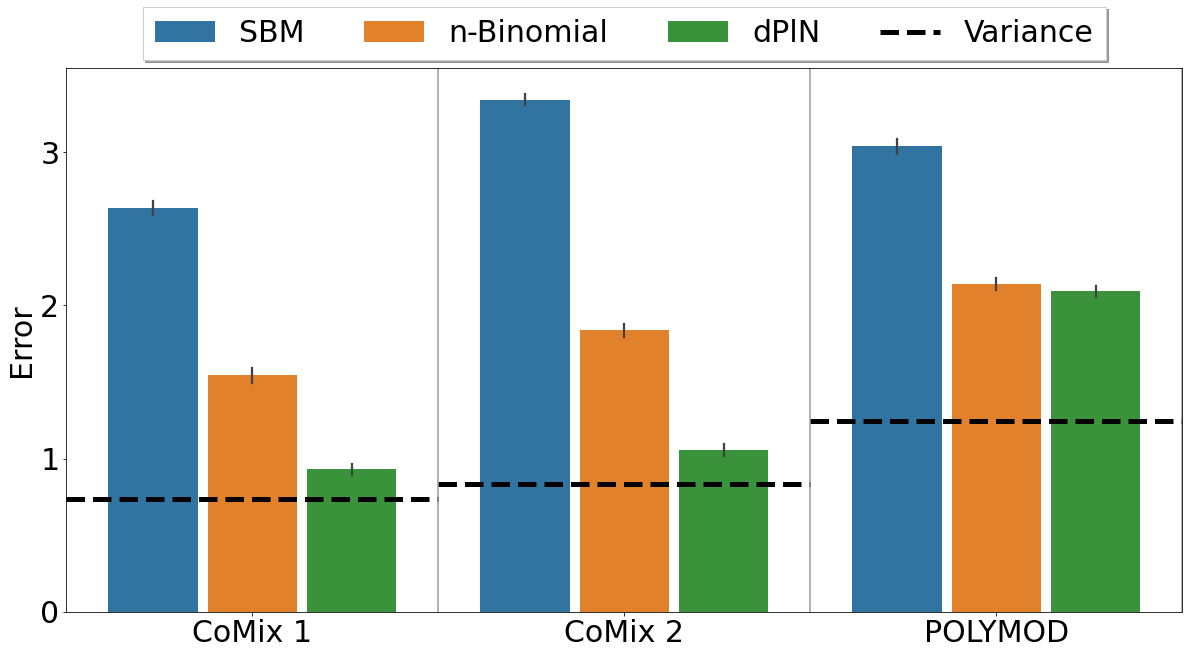

In [4]:
datas = ['comix1', 'comix2', 'poly']
models = ['sbm', 'nbinom', 'dpln']
data_names = ['CoMix 1', 'CoMix 2', 'POLYMOD']
model_names = ['SBM', 'n-Binomial', 'dPlN']

df, var = pd.DataFrame({}), pd.DataFrame({})
for i, data in enumerate(datas):
    for j, model in enumerate(models):
        try:
            tmp = np.loadtxt(f'output_data/errors/{data}_{model}.csv', delimiter=',')
            df = pd.concat([df, pd.DataFrame({'Error': tmp, 'Model': [f'{model_names[j]}' for _ in range(len(tmp))], 'Data': [f'{data_names[i]}' for _ in range(len(tmp))]})])
        except:
            print(f'oops no output_data/errors/{data}_{model}.csv')
        try: 
            tmp_var = np.loadtxt(f'output_data/errors/itself_{data}_{model}.csv', delimiter=',')
            var = pd.concat([var, pd.DataFrame({'Error': tmp_var, 'Model': [f'{model_names[j]}' for _ in range(len(tmp_var))], 'Data': [f'{data_names[i]}' for _ in range(len(tmp_var))]})])
        except:
            print(f'')

plt.rcParams.update({'font.size':30})
plt.figure(figsize=(20,10))
df_reduced = df[df['Model'] != 'Reconstruction']

sns.barplot(data=df_reduced, x='Data', y='Error', hue='Model',errorbar=('sd',3), gap=0.1)

for data in data_names:
    df_less = df_reduced[df_reduced['Data'] == data]
    for key in set(df_reduced['Model']):
        print(f"{key}: {np.mean(df_reduced[df_reduced['Model'] == key]['Error'])}")
        
## variance line
for i, data in enumerate(data_names):
    var_less = var[var['Data'] == data]
    mean = np.mean(var_less['Error'])
    plt.plot([-1/2+i,1/2+i],[mean, mean], '--k', linewidth = 5, label='Variance' if i==0 else '') 

# sns.violinplot(data=df_reduced, x='Data', y='Error', hue='Model')
# sns.boxplot(data=df, x='Data', y='Error', hue='Model')
# plt.yscale('log')

for pos in range(3):  # Skip the last position
    plt.axvline(x=pos+1/2, color='gray', alpha=0.6, linewidth=2)
    # print(pos, np.mean(df[(df['Model'] == 'Reconstruction') & (df['Data'] == datas[pos])]['Error']))
    # plt.plot([pos-1/2+2e-3, pos+1/2-5e-3], [np.mean(df[(df['Model'] == 'Reconstruction') & (df['Data'] == datas[pos])]['Error']), np.mean(df[(df['Model'] == 'Reconstruction') & (df['Data'] == datas[pos])]['Error'])], 'k--', label='Model Variance' if pos==0 else '', linewidth=5)
plt.xlim([-1/2, 5/2])
plt.xlabel('')

plt.yticks([0,1,2,3])
# plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=4, fancybox=False, shadow=True)
# plt.savefig('error_plots.pdf', bbox_inches='tight')

plt.show()

## Duration Scaling

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

df_c1 = pd.read_csv('input_data/comix1.csv', delimiter=',')
df_c2 = pd.read_csv('input_data/comix2.csv', delimiter=',')

############################################### CoMix 1 ########################################################'
bin_centers, bin_tops = [], [1,5,15,60,60*4,60*24]
for i, top in enumerate(bin_tops[1:]):
    gmean = sc.stats.mstats.gmean(list(range(bin_tops[i], top)))
    bin_centers.append(gmean)
    #try lower bounds
    # bin_centers.append(bin_tops[i])

bin_centers.append(bin_centers[0])
 

dur_counts_c1, freq_counts_c1 = np.zeros((len(set(df_c1['part_id'])), 6)), np.zeros((len(set(df_c1['part_id'])), 6)) 
for part_index, part_id in enumerate(set(df_c1['part_id'])):
    df_tmp = df_c1[df_c1['part_id'] == part_id]
    for _, row in df_tmp.iterrows():
        if np.isnan(row['duration_multi']):
            dur_counts_c1[part_index, -1] += 1
        else:
            dur_counts_c1[part_index, int(row['duration_multi'])-1] += 1
        
        if np.isnan(row['frequency_multi']):
            freq_counts_c1[part_index, -1] += 1
        else:
            freq_counts_c1[part_index, int(row['frequency_multi'])-1] += 1
            

xs, ys = [], []
for person in dur_counts_c1:
    if sum(person[:-1]) >0:
        xs.append(sum(person))
        ys.append(sum([a*bin_centers[i] for i,a in enumerate(person)]) / xs[-1])
    
# sort lists 
# Pair each element with its original index using enumerate
indexed_list = list(enumerate(xs)) 

# Sort the list by the elements while keeping the original indices
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])

# Extract the sorted elements and their original indices
sorted_xs = np.array([element for _, element in sorted_indexed_list])
original_indices = [index for index, _ in sorted_indexed_list]

sorted_ys = np.array([ys[original_indices[i]]/(60) for i, x in enumerate(xs)])
xs = list(range(1, int(max(sorted_xs))+1))
x_counts, ys = np.zeros(int(max(sorted_xs))), np.zeros(int(max(sorted_xs))) 

for i, y in enumerate(sorted_ys):
    x_counts[int(sorted_xs[i])-1] += 1
    ys[int(sorted_xs[i])-1] += y
    
############# try binning data ############

tmp, first, x_bins, x_tops = 0, 1, [], []
for i,x in enumerate(x_counts):
    tmp += x
    if tmp > 5:
        x_tops.append(i+1)    
        x_bins.append(sc.stats.mstats.gmean(list(range(first,i+2))))
        first = i+2
        tmp = 0

y_bins = np.zeros(len(x_tops)) 
for i, x_top in enumerate(x_tops):
    tmp_num, tmp_sum = 0, 0 
    for idx in range(0 if i==0 else x_tops[i-1], x_top):
        tmp_num += x_counts[idx]
        tmp_sum += ys[idx]
    y_bins[i] = tmp_sum/tmp_num

x_c1,y_c1,x_c1_counts = xs, ys/x_counts, x_counts

## binned
x_c1_bins, y_c1_bins = x_bins, y_bins

############################################## CoMix 2 ######################################################

dur_counts_c2, freq_counts_c2 = np.zeros((len(set(df_c2['part_id'])), 6)), np.zeros((len(set(df_c2['part_id'])), 6)) 
for part_index, part_id in enumerate(set(df_c2['part_id'])):
    df_tmp = df_c2[df_c2['part_id'] == part_id]
    for _, row in df_tmp.iterrows():
        if np.isnan(row['duration_multi']):
            dur_counts_c2[part_index, -1] += 1
        else:
            dur_counts_c2[part_index, int(row['duration_multi'])-1] += 1
        
        if np.isnan(row['frequency_multi']):
            freq_counts_c2[part_index, -1] += 1
        else:
            freq_counts_c2[part_index, int(row['frequency_multi'])-1] += 1
            

xs, ys = [], []
for person in dur_counts_c2:
    if sum(person[:-1]) >0:
        xs.append(sum(person))
        ys.append(sum([a*bin_centers[i] for i,a in enumerate(person)]) / xs[-1])
    
# sort lists 
# Pair each element with its original index using enumerate
indexed_list = list(enumerate(xs)) 

# Sort the list by the elements while keeping the original indices
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])

# Extract the sorted elements and their original indices
sorted_xs = np.array([element for _, element in sorted_indexed_list])
original_indices = [index for index, _ in sorted_indexed_list]

sorted_ys = np.array([ys[original_indices[i]]/(60) for i, x in enumerate(xs)])
xs = list(range(1, int(max(sorted_xs))+1))
x_counts, ys = np.zeros(int(max(sorted_xs))), np.zeros(int(max(sorted_xs))) 

for i, y in enumerate(sorted_ys):
    x_counts[int(sorted_xs[i])-1] += 1
    ys[int(sorted_xs[i])-1] += y
    
    
############# try binning data ############

tmp, first, x_bins, x_tops = 0, 1, [], []
for i,x in enumerate(x_counts):
    tmp += x
    if tmp > 5:
        x_tops.append(i+1)    
        x_bins.append(sc.stats.mstats.gmean(list(range(first,i+2))))
        first = i+2
        tmp = 0

y_bins = np.zeros(len(x_tops)) 
for i, x_top in enumerate(x_tops):
    tmp_num, tmp_sum = 0, 0 
    for idx in range(0 if i==0 else x_tops[i-1], x_top):
        tmp_num += x_counts[idx]
        tmp_sum += ys[idx]
    y_bins[i] = tmp_sum/tmp_num
    
x_c2,y_c2, x_c2_counts = xs, ys/x_counts, x_counts

## binned
x_c2_bins, y_c2_bins = x_bins, y_bins

/tmp/ipykernel_20884/2406342283.py:79: RuntimeWarning: invalid value encountered in divide
  x_c1,y_c1,x_c1_counts = xs, ys/x_counts, x_counts
/tmp/ipykernel_20884/2406342283.py:146: RuntimeWarning: invalid value encountered in divide
  x_c2,y_c2, x_c2_counts = xs, ys/x_counts, x_counts


0.0 0.0006850398760138171
[ 1.92956894e-01  2.59704669e-01  3.80034378e+04  9.99807691e-01
 -3.79945575e+04]
[ 5.93873598e-02  1.81042228e-01  1.06873503e+05  9.99929091e-01
 -1.06864101e+05]


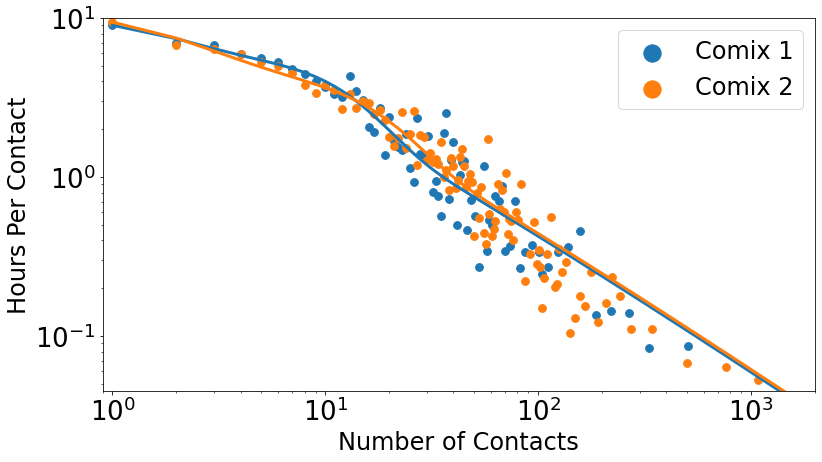

In [18]:
plt.rcParams.update({'font.size': 26})

def curve3(x, A, B, C, D, E):
    x = np.array(x)
    return A*np.exp(-B*x)*np.power(x,2) + C/np.power(x,D) + E/x 


x = list(range(1,max(x_c2)))
data, durations = [], []
for person in dur_counts_c1:
    if sum(person[:-1]) >0:
        data.append(sum(person))
        durations.append(sum([a*bin_centers[i] for i,a in enumerate(person)]) / xs[-1])
for person in dur_counts_c2:
    if sum(person[:-1]) >0:
        data.append(sum(person))
        durations.append(sum([a*bin_centers[i] for i,a in enumerate(person)]) / xs[-1])


## Remove Nans from data
x_c1 = [i for i, x in zip(x_c1 , y_c1) if not np.isnan(x)]
y_c1 = [a for a in y_c1 if not np.isnan(a)]

x_c2 = [i for i, x in zip(x_c2 , y_c2) if not np.isnan(x)]
y_c2 = [a for a in y_c2 if not np.isnan(a)]

plt.figure(figsize=(12, 7))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hours Per Contact', fontsize=24)
plt.xlabel('Number of Contacts', fontsize=24)
## fit plots
# plt.scatter(x_c1 , np.array(y_c1), label='Comix 1')
# plt.scatter(x_c2, np.array(y_c2), label='Comix 2')
plt.scatter(x_c1_bins , np.array(y_c1_bins), s=60)
plt.scatter(x_c2_bins, np.array(y_c2_bins), s=60)
plt.scatter([-1],[-1], color = 'tab:blue', label='Comix 1', s=300)
plt.scatter([-1],[-1], color ='tab:orange', label='Comix 2', s=300)

####################################### fitting curve 3 #############################################
# # y = A*(x^2)*exp(-Bx) + C/(x^D) + E/x
print(min(np.log(data)), min(durations))
# p_opt1, _ = sc.optimize.curve_fit(curve1, data, durations, bounds=([0, -np.inf, 0],[np.inf, np.inf, 1]))
p_opt1, _ = sc.optimize.curve_fit(curve3, x_c1 , y_c1, bounds=([0, 0, 0, 0, -np.inf],[np.inf, np.inf, np.inf, 1, np.inf]))
print(p_opt1)
plt.plot(x, curve3(x,p_opt1[0], p_opt1[1], p_opt1[2], p_opt1[3], p_opt1[4]), linewidth=3)

p_opt2, _ = sc.optimize.curve_fit(curve3, x_c2, y_c2, bounds=([0, 0, 0, 0, -np.inf],[np.inf, np.inf, np.inf, 1, np.inf]))
print(p_opt2)
plt.plot(x, curve3(x,p_opt2[0], p_opt2[1], p_opt2[2], p_opt2[3], p_opt2[4]), linewidth=3)


# x2,y2 = xs, ys/x_counts
plt.xlim([9/10,2e3])
plt.ylim([4.5e-2,10])
plt.legend(prop={'size':24})
plt.tight_layout()
# plt.savefig('output/comix_dur_with_fits.pdf')
plt.show()


## Final Size and Peak Height

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import json

/tmp/ipykernel_20884/413108595.py:164: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R = 1 - np.array([sc.optimize.fsolve(R_inf, x0=0.1, args=(r0), xtol=1e-10)[0] if r0 > 1 else 1 for r0 in r0s_ode])




















































































comix1 sbm 66956











































































































comix1 dpln 14817


/tmp/ipykernel_20884/413108595.py:157: RuntimeWarning: invalid value encountered in log
  return (r0*(1-S) + np.log(S))**2
/home/lmurraykearney/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


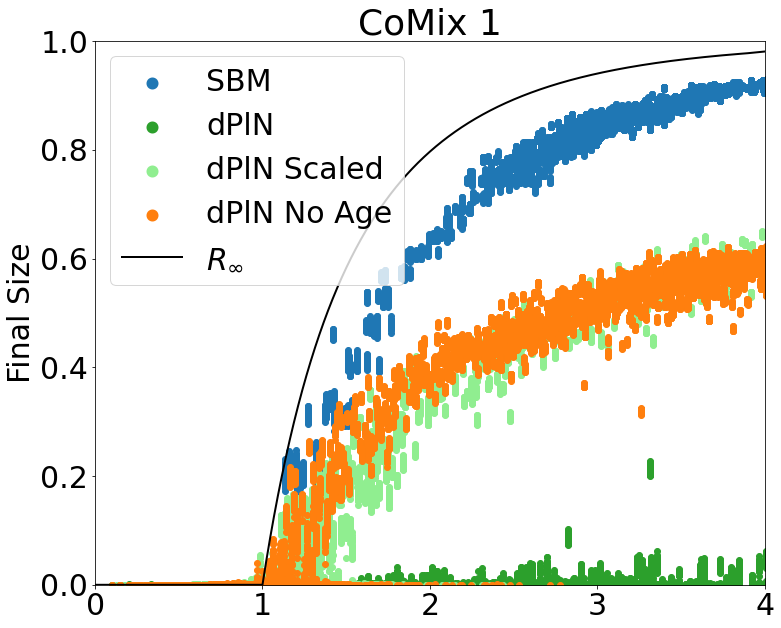

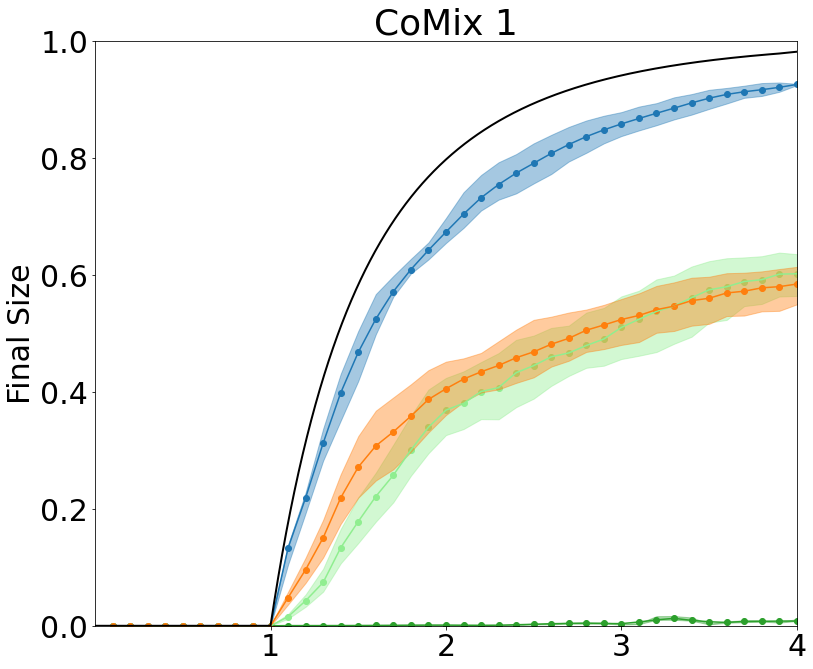

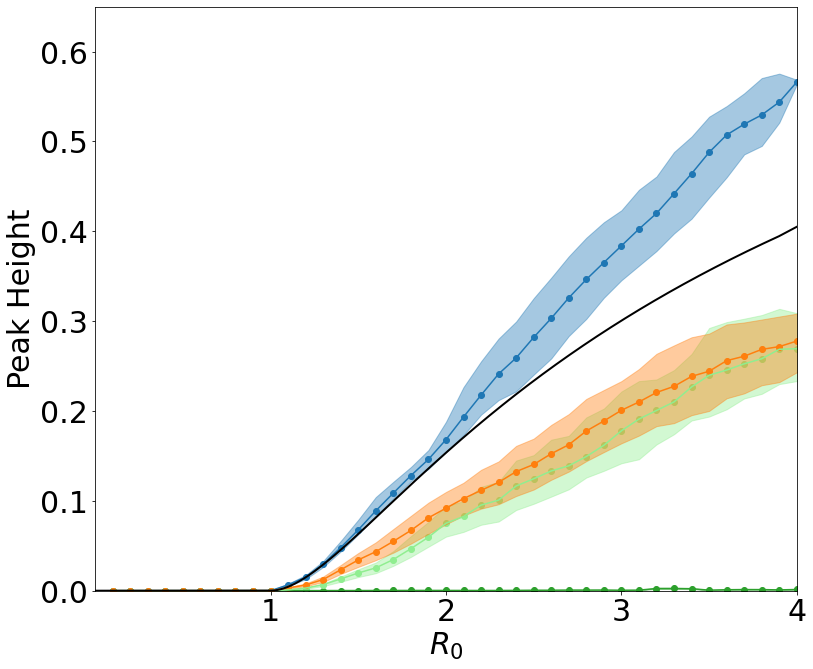




















































































comix2 sbm 46571


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])




dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])



dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])



dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])

dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])





dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])








dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])





dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])


dict_keys(['r0_1', 'r0_23', 'final_size', 'peak_height'])





dict_keys(['r0_1', 'r0_23', 'final_size'

/home/lmurraykearney/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


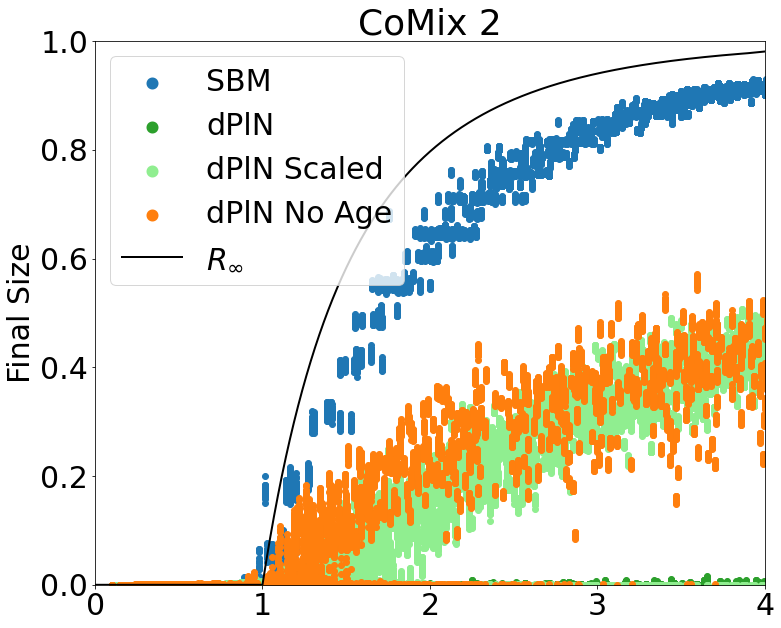

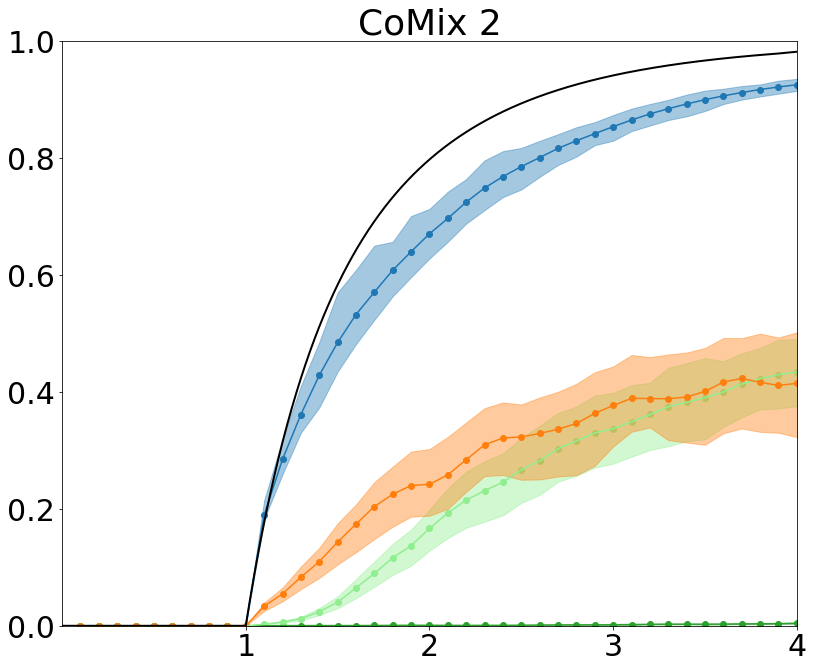

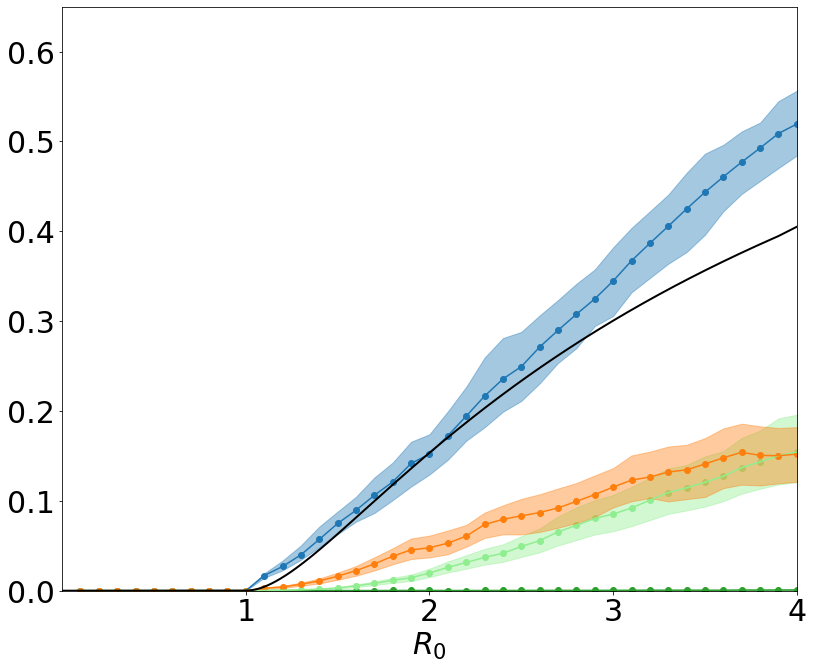





















































































poly sbm 37808




















































































































poly dpln 74807


/home/lmurraykearney/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


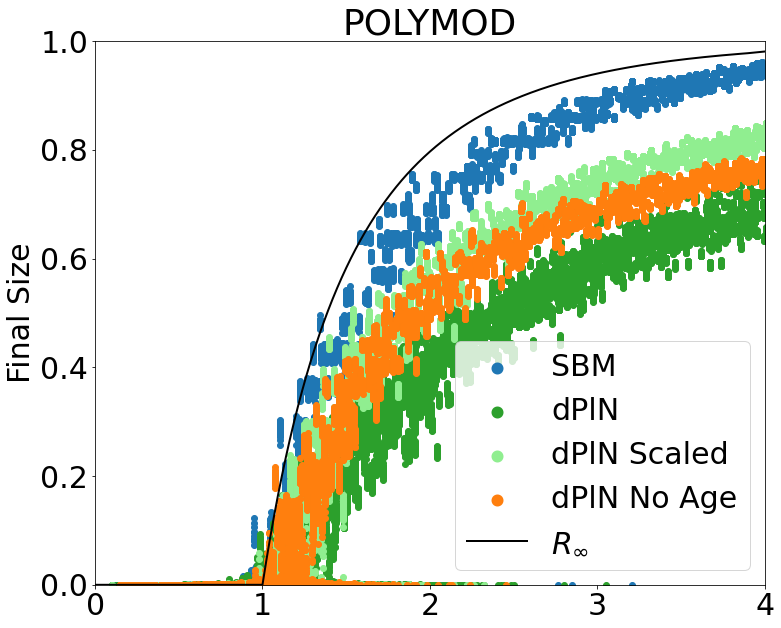

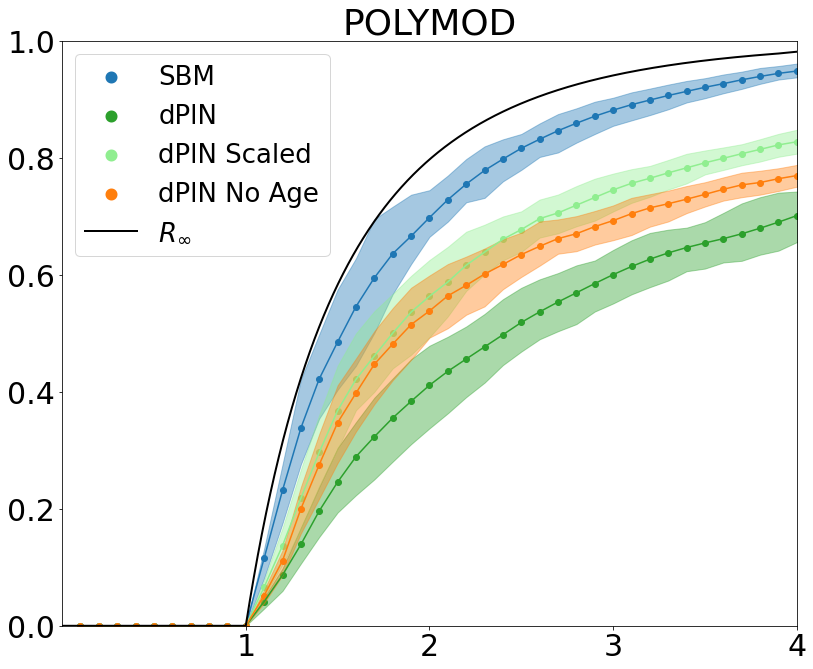

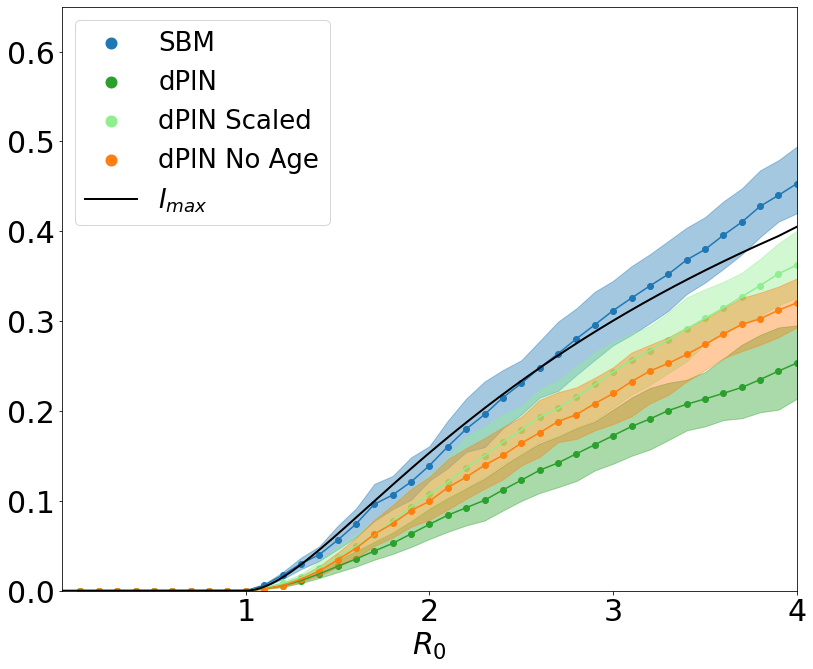

In [33]:
## maybe try scale this by the number of zeros in age vs no age... to change that no age goes below age structured 
plt.rcParams.update({'font.size': 30})


###################### Try do an R0 for each Tau #####################################

n = 100_000
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]

datas = ['comix1','comix2','poly']
data_names = ['CoMix 1', 'CoMix 2', 'POLYMOD']
models = ['sbm','dpln']
model_names =['SBM', 'dPlN']
scales_n = ['none']
scales_s = ['fit1', 'fit2']

############################### no scale ################################
## 0
taus_n0 = [[np.arange(0.001,0.1,0.0025), np.arange(0.001,0.06,0.001)],
        [np.arange(0.001,0.1,0.0025), np.arange(0.001,0.06,0.001)],
        [np.arange(0.001,0.1,0.0025), np.arange(0.001,0.1,0.0025)]]
## 1,2,3,4
taus_n1 = [[np.arange(0.001,0.1,0.005), np.arange(0.001,0.06,0.002)],
        [np.arange(0.001,0.1,0.005), np.arange(0.001,0.06,0.002)],
        [np.arange(0.001,0.1,0.005), np.arange(0.001,0.1,0.005)]]
# 5,6,7,8,9
taus_n2 = [[np.arange(0.1,0.205,0.005), np.arange(0.0005,0.01,0.0005)],
        [np.arange(0.05,0.2,0.01), np.arange(0.0005,0.01,0.0005)],
        [np.arange(0.001,0.1,0.005), np.arange(0.0025,0.05,0.0025)]]
# 10,11,12,13,14,15
taus_n3 = [[np.arange(0.1,0.305,0.005), np.arange(0.0001,0.005,0.0001)],
        [np.arange(0.05,0.25,0.005), np.arange(0.0001,0.005,0.0001)],
        [np.arange(0.001,0.1,0.002), np.arange(0.0001,0.04,0.0001)]]
# 17
taus_n4 = [[np.arange(0.28,0.38,0.005), np.arange(0.0001,0.005,0.0001)],
        [np.arange(0.2,0.32,0.005), np.arange(0.0001,0.002,0.0001)],
        [np.arange(0.001,0.08,0.001), np.arange(0.0001,0.03,0.0001)]]
# 18,19
taus_n5 = [[np.arange(0.005,0.1,0.005), np.arange(0.0005,0.005,0.0005)],
        [np.arange(0.005,0.1,0.005), np.arange(0.00005,0.001,0.00005)],
        [np.arange(0.001,0.05,0.001), np.arange(0.0001,0.03,0.0001)]]
# 20,21,22
taus_n6 = [[np.arange(0.005,0.05,0.005), np.arange(0.0001,0.005,0.0001)],
        [np.arange(0.005,0.05,0.005), np.arange(0.00005,0.001,0.00005)],
        [np.arange(0.001,0.025,0.001), np.arange(0.0005,0.015,0.0005)]]
# 23,24
taus_n7 = [[np.arange(0.1,0.205,0.005), np.arange(0.0005,0.01,0.0005)],
        [np.arange(0.05,0.2,0.01), np.arange(0.0005,0.01,0.0005)],
        [np.arange(0.001,0.1,0.005), np.arange(0.0025,0.05,0.0025)]]

taus_n = [taus_n0,taus_n1,taus_n2,taus_n3,taus_n4,taus_n5,taus_n6,taus_n7]

############################### scale ##################################
## 0
taus_s0 = [[np.arange(0.001,0.1,0.0025), np.arange(0.001,0.06,0.001)],
        [np.arange(0.001,0.1,0.0025), np.arange(0.001,0.06,0.001)],
        [np.arange(0.001,0.1,0.0025), np.arange(0.001,0.1,0.0025)]]
taus_s0 = [[10*x for x in a] for a in taus_s0]
## 1,2,3,4
taus_s1 = [[np.arange(0.001,0.1,0.005), np.arange(0.001,0.06,0.002)],
        [np.arange(0.001,0.1,0.005), np.arange(0.001,0.06,0.002)],
        [np.arange(0.001,0.1,0.005), np.arange(0.001,0.1,0.005)]]
taus_s1 = [[10*x for x in a] for a in taus_s1]
## 5,6,7,8
taus_s2 = [[[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.05,0.002)]]
taus_s2 = [[10*x for x in a] for a in taus_s2]
# 10,11,12,13,14,15
taus_s3 = [[[],np.arange(0.0005,0.01,0.0005)],
        [[],np.arange(0.0005,0.09,0.0005)],
        [[],np.arange(0.0005,0.06,0.0005)]]
taus_s3 = [[10*x for x in a] for a in taus_s3]
# 17
taus_s4 = [[[],np.arange(0.0005,0.01,0.0005)],
        [[],np.arange(0.0005,0.09,0.0005)],
        [[],np.arange(0.0005,0.06,0.0005)]]
taus_s4 = [[15*x for x in a] for a in taus_s4]
# 18,19
taus_s5 = [[[],np.arange(0.005,0.3,0.005)],
        [[],np.arange(0.005,0.4,0.005)],
        [[],np.arange(0.005,0.2,0.005)]]
# 20,21,22
taus_s6 = [[[],np.arange(0.0025,0.1,0.0025)],
        [[],np.arange(0.0025,0.1,0.0025)],
        [[],np.arange(0.0025,0.1,0.0025)]]
# 23
taus_s7 = [[[],np.arange(0.0005,0.01,0.0005)],
        [[],np.arange(0.0005,0.09,0.0005)],
        [[],np.arange(0.0005,0.06,0.0005)]]
taus_s7 = [[15*x for x in a] for a in taus_s7]

taus_s = [taus_s0,taus_s1,taus_s2,taus_s3,taus_s4,taus_s5,taus_s6,taus_s7]
############################### noage ################################
## 0,1
taus_na0 = [[[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.05,0.002)]]
taus_na0 = [[10*x for x in a] for a in taus_na0]
## 2,3
taus_na1 = [[[],np.arange(0.001,0.07,0.001)],
        [[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.05,0.002)]]
taus_na1 = [[20*x for x in a] for a in taus_na1]
## 4,5
taus_na2 = [[[],np.arange(0.005,0.4,0.005)],
        [[],np.arange(0.001,0.07,0.002)],
        [[],np.arange(0.001,0.05,0.002)]]
## 6,7
taus_na3 = [[[],np.arange(0.4,0.605,0.005)],
        [[],np.arange(0.07,0.09,0.002)],
        [[],np.arange(0.05,0.09,0.002)]]
## 8,9,10,11,12
taus_na4 = [[[],np.arange(0.005,0.205,0.005)],
        [[],np.arange(0.001,0.02,0.002)],
        [[],np.arange(0.001,0.04,0.002)]]
## 13,14
taus_na5 = [[[],np.arange(0.4,0.805,0.005)],
        [[],np.arange(0.07,0.11,0.002)],
        [[],np.arange(0.05,0.11,0.002)]]
taus_na6 = [[[],np.arange(0.2,0.605,0.005)],
            [[],np.arange(0.09,0.4,0.005)],
            [[],np.arange(0.05,0.3,0.005)]]

taus_na = [taus_na0,taus_na1,taus_na2,taus_na3,taus_na4,taus_na5,taus_na6]
#######################################################################

# bins 
top, step = 4.5, 0.10
bins = np.arange(step, top + step, step)
bin_centers = np.array([a/2 if i == 0 else a - (a - bins[i-1])/2 for i,a in enumerate(bins)])
digit = [a for a in bins]; digit.append(1e6)

#colours
# colours = {models[0]: 'tab:blue', models[1]: 'tab:green'}
# colours_scaled = {models[0]: 'lightblue', models[1]: 'red'}

# colours = {models[0]: "#0072B2", models[1]: "#D55E00"}
# colours_scaled = {models[0]: "#56B4E9", models[1]: "#E69F00"}
# colours_noage = {models[0]: "#CC79A7", models[1]: "#009E73"}
# colours_noage = {models[0]: "#CC79A7", models[1]: "#CC79A7"}

colours = {models[0]: "tab:blue", models[1]: "tab:green"}
colours_scaled = {models[0]: "#56B4E9", models[1]: "lightgreen"}
colours_noage = {models[0]: "#CC79A7", models[1]: "tab:orange"}

available_colors = [
    'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink',
    'brown', 'black', 'white', 'gray', 'cyan', 'magenta',
    'lime', 'teal', 'navy', 'maroon', 'olive', 'gold', 'silver'
]


# ode solutions 
# R_inf
def R_inf(S, r0):
    return (r0*(1-S) + np.log(S))**2

def max_I(r0, S_0=1-10/n, I_0=10/n):
    return I_0 + S_0 + (1/r0)*(np.log(1/r0) - 1 - np.log(S_0))

r0s_ode = np.arange(0,3.9,0.001)

R = 1 - np.array([sc.optimize.fsolve(R_inf, x0=0.1, args=(r0), xtol=1e-10)[0] if r0 > 1 else 1 for r0 in r0s_ode])
peak_I = np.array([max_I(r0) if r0 > 1 else 0 for r0 in r0s_ode])

for i, data in enumerate(datas):
    fig1,ax1 = plt.subplots(1,1,figsize=(12,10))
    fig2,ax2 = plt.subplots(1,1,figsize=(12,10))


    for j, model in enumerate(models):
        fs_n, ph_n = [[] for _ in bins], [[] for _ in bins]
        fs_s, ph_s = [[] for _ in bins], [[] for _ in bins]
        fs_na, ph_na = [[] for _ in bins], [[] for _ in bins]
        
        r0s_n, fs_n_try, ph_n_try = [], [], []
        r0s_s, fs_s_try, ph_s_try = [], [], []
        r0s_na, fs_na_try, ph_na_try = [], [], []
        
        for sim_num in range(40):
            
            #######         no scale        ################
            
            for scale in scales_n:
                try:
                    with open(f'output_data/sims/{sim_num}_{data}_{model}_{scale}.json','r') as f:
                        tmp = json.load(f)
                    for tau, tau_sim in enumerate(tmp['r0_1']):
                    # for tau, tau_sim in enumerate(tmp['r0_23']):
                        
                        r0 = np.mean([a for a in tau_sim if a > 0]) if len([a for a in tau_sim if a > 0]) > 0 else -1
                        if r0 == -1: 
                            continue
                        final_sizes = [a for a in tmp['final_size'][tau] if a > 0]
                        peak_heights = [a for a in tmp['peak_height'][tau] if a > 0]
                        bin_idx = np.digitize(r0, digit, right=False)
                        if bin_idx < len(bins):
                            fs_n_try.append([])
                            for k, sims in enumerate(final_sizes):
                                fs_n[bin_idx].append(sims/n)
                                ph_n[bin_idx].append(peak_heights[k]/n)
                                
                                fs_n_try[-1].append(sims/n)
                                # fs_n_try.append(peak_heights[k]/n)
                            r0s_n.append(r0)
                except: 
                    # print(f'No file {sim_num}_{data}_{model}_{scale}.json')
                    print('')
                
            ########          scaled           ############    
            # if means_z[i][1] > 0 and means_z[i][2] > 0:
            #     scale_zeros = 1 + (means_z[i][2] - means_z[i][1])/(means_z[i][2]) 
            # else:
            scale_zeros = 1          
            for scale in scales_s:
                try:
                    with open(f'output_data/sims/{sim_num}_{data}_{model}_{scale}.json','r') as f:
                        tmp = json.load(f)
                    for tau, tau_sim in enumerate(tmp['r0_1']):
                    # for tau, tau_sim in enumerate(tmp['r0_23']):
                        
                        r0 = np.mean([a for a in tau_sim if a > 0]) if len([a for a in tau_sim if a > 0]) > 0 else -1
                        if r0 == -1: 
                            continue
                        final_sizes = [a for a in tmp['final_size'][tau] if a > 0]
                        peak_heights = [a for a in tmp['peak_height'][tau] if a > 0]
                        bin_idx = np.digitize(r0, digit, right=False)
                        if bin_idx < len(bins):
                            fs_s_try.append([])
                            for k, sims in enumerate(final_sizes):
                                fs_s[bin_idx].append(scale_zeros*sims/n)
                                ph_s[bin_idx].append(scale_zeros*peak_heights[k]/n)
                                
                                fs_s_try[-1].append(sims/n)
                                # fs_s_try.append(peak_heights[k]/n)
                            r0s_s.append(r0)
                except: 
                    # print(f'No file {sim_num}_{data}_{model}_{scale}.json')
                    print('')
                    
                
                
                if model == 'dpln':
                    try:
                        if data == 'comix2':
                            with open(f'output_data/sims/{sim_num}_{data}_{model}_{scale}_noage5.json','r') as f:
                                tmp = json.load(f)
                                print(tmp.keys())
                            for tau, tau_sim in enumerate(tmp['r0_1']):
                            # for tau, tau_sim in enumerate(tmp['r0_23']):
                                n_small = 30_000
                                r0 = np.mean([a for a in tau_sim if a > 0]) if len([a for a in tau_sim if a > 0]) > 0 else -1
                                if r0 == -1: 
                                    continue
                                final_sizes = [a for a in tmp['final_size'][tau] if a > 0]
                                peak_heights = [a for a in tmp['peak_height'][tau] if a > 0]
                                bin_idx = np.digitize(r0, digit, right=False)
                                if bin_idx < len(bins):
                                    fs_na_try.append([])
                                    for k, sims in enumerate(final_sizes):
                                        fs_na[bin_idx].append(sims/n_small)
                                        ph_na[bin_idx].append(peak_heights[k]/n_small)
                                        
                                        fs_na_try[-1].append(sims/n_small)
                                        # fs_na_try.append(peak_heights[k]/n_small)
                                    r0s_na.append(r0)
                        else:
                            with open(f'output_data/sims/{sim_num}_{data}_{model}_{scale}_noage.json','r') as f:
                                tmp = json.load(f)
                            for tau, tau_sim in enumerate(tmp['r0_1']):
                            # for tau, tau_sim in enumerate(tmp['r0_23']):
                                
                                r0 = np.mean([a for a in tau_sim if a > 0]) if len([a for a in tau_sim if a > 0]) > 0 else -1
                                if r0 == -1: 
                                    continue
                                final_sizes = [a for a in tmp['final_size'][tau] if a > 0]
                                peak_heights = [a for a in tmp['peak_height'][tau] if a > 0]
                                bin_idx = np.digitize(r0, digit, right=False)
                                if bin_idx < len(bins):
                                    fs_na_try.append([])
                                    for k, sims in enumerate(final_sizes):
                                        fs_na[bin_idx].append(sims/n)
                                        ph_na[bin_idx].append(peak_heights[k]/n)    
                                        
                                        fs_na_try[-1].append(sims/n)
                                        # fs_na_try.append(peak_heights[k]/n)
                                    r0s_na.append(r0)                
                                    
                    except:
                        # print(f'No file {sim_num}_{data}_{model}_{scale}_noage.json')
                        print('')
                        
        
        print(f'{data} {model} {sum([len(a) for a in fs_n])}')
        
        mean, up, down = [np.mean(a) for a in fs_n if len(a)>0], [np.percentile(a, 95) for a in fs_n if len(a)>0], [np.percentile(a, 5) for a in fs_n if len(a)>0]
        # fs_n = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(fs_n) if len(a)>0]
        index, tmp = 0, []
        for a in fs_n:
            if len(a) > 0:
                tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                index += 1
        fs_n = tmp
        mean, up, down = [np.mean(a) for a in fs_n if len(a)>0], [np.percentile(a, 95) for a in fs_n if len(a)>0], [np.percentile(a, 5) for a in fs_n if len(a)>0]
        x = [bins[idx] for idx, a in enumerate(fs_n) if len(a)>0]
        start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)

        mean = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)]
        mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if i in [start,end-1] else a if i<start else (up[i-1]+a+up[i+1])/3 for i, a in enumerate(up)]        
        mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
    
        ax1.scatter(x, mean, color=colours[model])
        ax1.plot(x, mean, color=colours[model])
        ax1.fill_between(x, down,up, alpha = 0.4, color=colours[model])
        ax1.scatter([-1],[-1], label = f'{model_names[j]}', linewidths=6, color=colours[model])
        
        if model == 'dpln':
            mean, up, down = [np.mean(a) for a in fs_s if len(a)>0], [np.percentile(a, 95) for a in fs_s if len(a)>0], [np.percentile(a, 5) for a in fs_s if len(a)>0]
            # fs_s = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(fs_s) if len(a)>0]        index, tmp = 0, []
            index, tmp = 0, []
            for a in fs_s:
                if len(a) > 0:
                    tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                    index += 1
            fs_s = tmp
            mean, up, down = [np.mean(a) for a in fs_s if len(a)>0], [np.percentile(a, 95) for a in fs_s if len(a)>0], [np.percentile(a, 5) for a in fs_s if len(a)>0]
            x = [bins[idx] for idx, a in enumerate(fs_s) if len(a)>0]
            start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)
            ### smoothing
            mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if idx in [start,end-1] else a  if idx<start else (up[idx-1]+a+up[idx+1])/3 for idx, a in enumerate(up)]        
            mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
            
            ax1.scatter(x, mean, color=colours_scaled[model])
            ax1.plot(x, mean, color=colours_scaled[model])
            ax1.fill_between(x, down,up, alpha = 0.4, color=colours_scaled[model])
            ax1.scatter([-1],[-1], label = f'{model_names[j]} Scaled', linewidths=6, color=colours_scaled[model])
            
        if model == 'dpln':
            mean, up, down = [np.mean(a) for a in fs_na if len(a)>0], [np.percentile(a, 95) for a in fs_na if len(a)>0], [np.percentile(a, 5) for a in fs_na if len(a)>0]
            # fs_na = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(fs_na) if len(a)>0]
            index, tmp = 0, []
            for a in fs_na:
                if len(a) > 0:
                    tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                    index += 1
            fs_na = tmp
            mean, up, down = [np.mean(a) for a in fs_na if len(a)>0], [np.percentile(a, 95) for a in fs_na if len(a)>0], [np.percentile(a, 5) for a in fs_na if len(a)>0]
            x = [bins[idx] for idx, a in enumerate(fs_na) if len(a)>0]
            start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)
            ### smoothing
            mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if idx in [start,end-1] else a  if idx<start else (up[idx-1]+a+up[idx+1])/3 for idx, a in enumerate(up)]        
            mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
            
            ax1.scatter(x, mean, color=colours_noage[model])
            ax1.plot(x, mean, color=colours_noage[model])
            ax1.fill_between(x, down,up, alpha = 0.4, color=colours_noage[model])
            ax1.scatter([-1],[-1], label = f'{model_names[j]} No Age', linewidths=6, color=colours_noage[model])
            
        mean, up, down = [np.mean(a) for a in ph_n if len(a)>0], [np.percentile(a, 95) for a in ph_n if len(a)>0], [np.percentile(a, 5) for a in ph_n if len(a)>0]
        # ph_n = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(ph_n) if len(a)>0]
        index, tmp = 0, []
        for a in ph_n:
            if len(a) > 0:
                tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                index += 1
        ph_n = tmp
        mean, up, down = [np.mean(a) for a in ph_n if len(a)>0], [np.percentile(a, 95) for a in ph_n if len(a)>0], [np.percentile(a, 5) for a in ph_n if len(a)>0]
        x = [bins[idx] for idx, a in enumerate(ph_n) if len(a)>0]
        start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)
        ### smoothing
        mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if idx in [start,end-1] else a  if idx<start else (up[idx-1]+a+up[idx+1])/3 for idx, a in enumerate(up)]        
        mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
        
        ax2.scatter(x, mean, color=colours[model])
        ax2.plot(x, mean, color=colours[model])
        ax2.fill_between(x, down,up, alpha = 0.4, color=colours[model])
        ax2.scatter([-1],[-1], label = f'{model_names[j]}', linewidths=6, color=colours[model])
        
        if model == 'dpln':
            mean, up, down = [np.mean(a) for a in ph_s if len(a)>0], [np.percentile(a, 95) for a in ph_s if len(a)>0], [np.percentile(a, 5) for a in ph_s if len(a)>0]
            # ph_n = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(ph_n) if len(a)>0]
            index, tmp = 0, []
            for a in ph_s:
                if len(a) > 0:
                    tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                    index += 1
            ph_s = tmp
            mean, up, down = [np.mean(a) for a in ph_s if len(a)>0], [np.percentile(a, 95) for a in ph_s if len(a)>0], [np.percentile(a, 5) for a in ph_s if len(a)>0]
            x = [bins[idx] for idx, a in enumerate(ph_s) if len(a)>0]
            start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)
            ### smoothing
            mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if idx in [start,end-1] else a  if idx<start else (up[idx-1]+a+up[idx+1])/3 for idx, a in enumerate(up)]        
            mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
            
            ax2.scatter(x, mean, color=colours_scaled[model])
            ax2.plot(x, mean, color=colours_scaled[model])
            ax2.fill_between(x, down,up, alpha = 0.4, color=colours_scaled[model])
            ax2.scatter([-1],[-1], label = f'{model_names[j]} Scaled', linewidths=6, color=colours_scaled[model])
        
        if model == 'dpln':
            mean, up, down = [np.mean(a) for a in ph_na if len(a)>0], [np.percentile(a, 95) for a in ph_na if len(a)>0], [np.percentile(a, 5) for a in ph_na if len(a)>0]
            # ph_na = [[b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33] for index, a in enumerate(ph_na) if len(a)>0]
            index, tmp = 0, []
            for a in ph_na:
                if len(a) > 0:
                    tmp.append([b for b in a if b/mean[index] > 1/1.33 and b/mean[index] < 1.33])
                    index += 1
            ph_na = tmp
            mean, up, down = [np.mean(a) for a in ph_na if len(a)>0], [np.percentile(a, 95) for a in ph_na if len(a)>0], [np.percentile(a, 5) for a in ph_na if len(a)>0]
            x = [bins[idx] for idx, a in enumerate(ph_na) if len(a)>0]
            start, end = [1 if a >= 1 else 0 for a in x].index(1), len(x)
            ### smoothing
            mean, up, down = [a if idx in [start,end-1] else a  if idx<start else (mean[idx-1]+a+mean[idx+1])/3 for idx, a in enumerate(mean)], [a if idx in [start,end-1] else a  if idx<start else (down[idx-1]+a+down[idx+1])/3 for idx, a in enumerate(down)], [a if idx in [start,end-1] else a  if idx<start else (up[idx-1]+a+up[idx+1])/3 for idx, a in enumerate(up)]        
            mean, up, down = [a if idx >= start + 1 else 0 for idx, a in enumerate(mean)], [a if idx >= start + 1 else 0 for idx, a in enumerate(up)], [a if idx >= start + 1 else 0 for idx, a in enumerate(down)]
            
            ax2.scatter(x, mean, color=colours_noage[model])
            ax2.plot(x, mean, color=colours_noage[model])
            ax2.fill_between(x, down,up, alpha = 0.4, color=colours_noage[model])
            ax2.scatter([-1],[-1], label = f'{model_names[j]} No Age', linewidths=6, color=colours_noage[model])
    
    r0s_ode = list(r0s_ode); R = list(R); peak_I = list(peak_I) 
    r0s_ode.append(4)
    peak_I.append(0.405)
    R.append(0.981)

    ax1.plot(r0s_ode,R,'k',label = r'$R_\infty$', linewidth=2)
    ax1.set_title(f'{data_names[i]}')
    ax1.set_ylabel('Final Size')
    ax1.set_xlim([0,4])
    ax1.set_ylim([0,1])
    if i == 2:
        ax1.legend(prop={'size': 26})
    if i != 0:
        ax1.set_ylabel('')
    ax1.set_xticks([1,2,3,4])
    
    fig1.tight_layout()
    # fig1.savefig(f'fs_{data}_dots.pdf')
    # fig1.show()
    
    ax2.plot(r0s_ode, peak_I,'k',label = r'$I_{max}$', linewidth=2)
    ax2.set_title(f'')
    ax2.set_ylabel('Peak Height')
    ax2.set_xlim([0,4])
    ax2.set_ylim([0,0.65])
    if i == 2:
        ax2.legend(prop={'size':26})
    if i != 0:
        ax2.set_ylabel('')
    ax2.set_xlabel(r'$R_0$')
    ax2.set_xticks([1,2,3,4])
    
    fig2.tight_layout()
    # fig2.savefig(f'ph_{data}_dots.pdf')
    # fig2.show() 

## Secondary Case Distributions

### Helper Functions

In [24]:
from scipy.stats import nbinom
def log_bins(x, num_bins=5):
    """
    Returns log bins of contacts, A^m
    Input: Contacts -> np array, num_bins -> int
    Output: Geometric center of bins -> ndarray, values in bins -> ndarray
    """
    count_zeros = np.sum([1 if a == 0 else 0 for a in x])
    x = np.sort([a for a in x if a > 0])
    max1, min1 = np.log(np.ceil(max(x))), np.log(np.floor(min(x)))
    x = np.log(x)
    t, freq, ends = np.zeros(num_bins), np.zeros(num_bins), np.zeros((2,num_bins))
    step = (max1 - min1)/num_bins
    for val in x:
        for k in range(num_bins):
            if k*step + min1 <= val and val < (k+1)*step + min1:
                freq[k] += 1
            t[k] = (k+1)*step - (.5*step) + min1
            ends[0,k] = k*step + min1
            ends[1,k] = (k+1)*step + min1
    freq[0] += count_zeros
    ends = np.exp(ends)
    widths = ends[1] - ends[0]
    freq = freq/widths/(len(x)+count_zeros)
    # freq = 1/np.sqrt(freq)*freq
    midpoints = np.exp(t)
    return midpoints, freq

def log_bins_from_a(x, min_val=5, num_bins=5):
    """
    Returns log bins of contacts, A^m
    Input: Contacts -> np array, num_bins -> int
    Output: Geometric center of bins -> ndarray, values in bins -> ndarray
    """
    start = len(x)
    # count_zeros = np.sum(x[x==0])
    count_zeros = sum([1 if a==0 else 0 for a in x])
    x_under_a = np.sort([a for a in x if a <= min_val])
    x = np.sort([a for a in x if a > 0])
    count_under_a = sum([1 if a<=min_val else 0 for a in x])
    x = np.sort([a for a in x if a > min_val])
    # print(f'all = {start}, {len(x) + count_zeros + count_under_a}')
    max1, min1 = np.log(np.ceil(max(x))), np.log(np.floor(min(x)))
    x = np.log(x)
    t, freq, ends = np.zeros(num_bins), np.zeros(num_bins), np.zeros((2,num_bins))
    step = (max1 - min1)/num_bins
    for val in x:
        for k in range(num_bins):
            if k*step + min1 <= val and val < (k+1)*step + min1:
                freq[k] += 1
            t[k] = (k+1)*step - (.5*step) + min1
            ends[0,k] = k*step + min1
            ends[1,k] = (k+1)*step + min1
    # freq[0] += count_zeros
    ends = np.exp(ends)
    widths = ends[1] - ends[0]
    freq = freq/widths/(len(x)+count_zeros + count_under_a)
    # freq = 1/np.sqrt(freq)*freq
    midpoints = np.exp(t)
    
    midpoints_ua = np.arange(min_val+1)
    freq_ua = np.zeros(min_val+1)
    for val in x_under_a:
        freq_ua[val] += 1
    freq = np.concatenate((freq_ua/(len(x)+count_zeros+count_under_a), freq))
    midpoints = np.concatenate((midpoints_ua, midpoints))
    return midpoints, freq

def log_likelihood_nbinom(params, contacts):
    r, p = params
    log_likelihood = nbinom.logpmf(contacts, r, p)
    return -np.sum(log_likelihood)

def log_likelihood_nbinom_mean(params, contacts,r0):
    r = params
    p = r/(r+r0)
    log_likelihood = nbinom.logpmf(contacts, r, p)
    return -np.sum(log_likelihood)

### Make figs


sbm k = 0.8732219268853182

80% of cases caused by 0.3986408017549142% of people

dpln k = 0.042607368094944045

80% of cases caused by 0.05504587155963303% of people


scale k = 0.468286995002449

80% of cases caused by 0.2878584132217065% of people


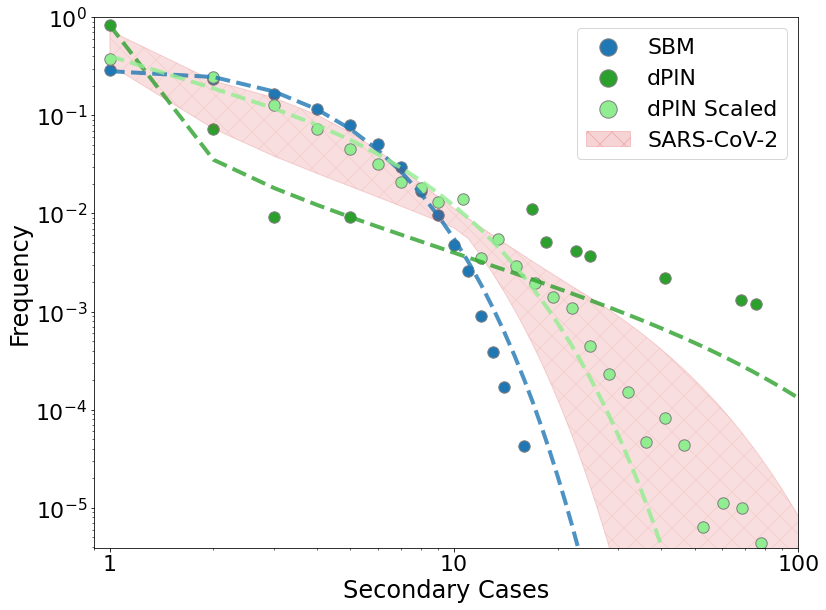


sbm k = 0.7936129637633078

80% of cases caused by 0.3836989247311828% of people

dpln k = 0.07317132973912331

80% of cases caused by 0.06911385144823631% of people


scale k = 0.36261041360025537

80% of cases caused by 0.24085689045936395% of people


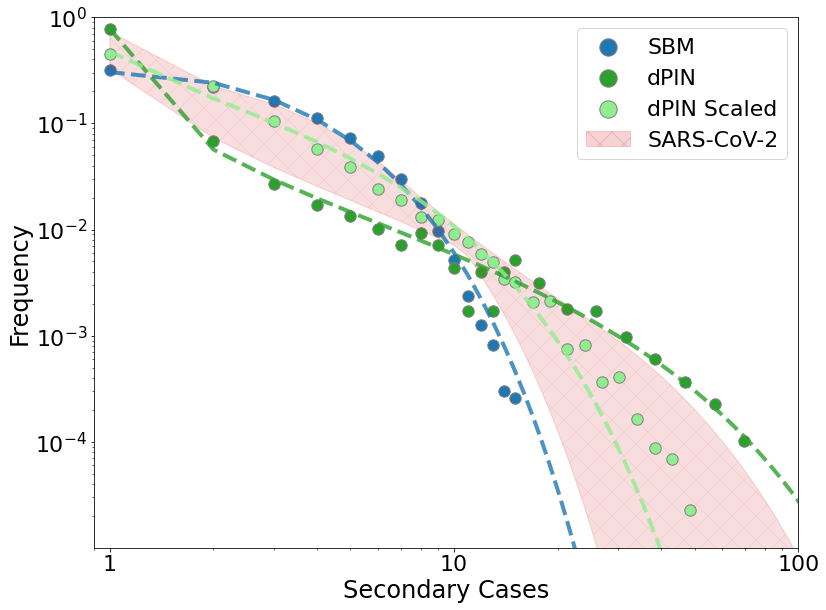


sbm k = 0.7403219948938176

80% of cases caused by 0.37267294380669846% of people

dpln k = 0.46485908982168256

80% of cases caused by 0.28996074032529445% of people


scale k = 0.6494673607328608

80% of cases caused by 0.3503611747912972% of people


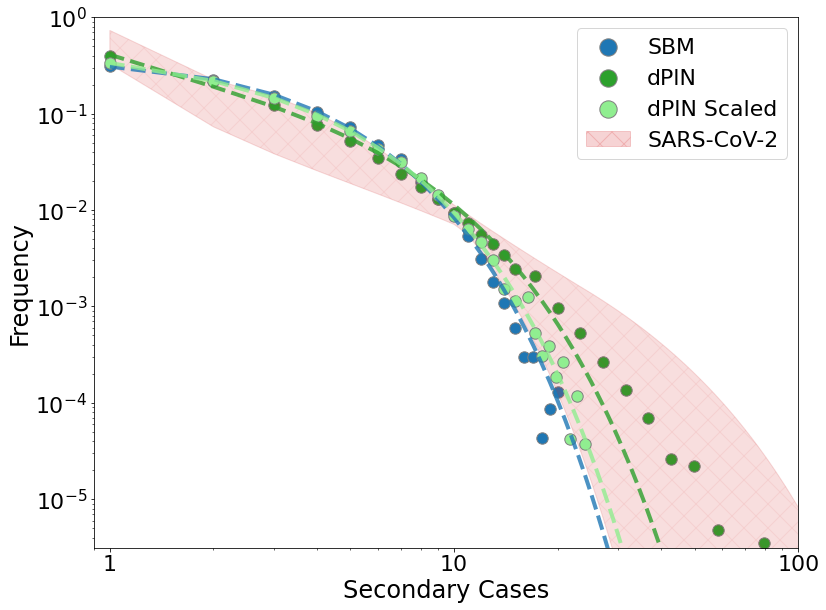

In [29]:
from scipy.stats import nbinom
from scipy.optimize import minimize
#### do this ########
n = 100_000
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]
plt.rcParams.update({'font.size': 24})

datas = ['comix1','comix2','poly']
data_names = ['CoMix 1', 'CoMix 2', 'POLYMOD']
models = ['sbm','dpln','scale']
model_names =['SBM', 'dPlN', 'Scaled']
scales_n = ['none']
scales_s = ['fit1', 'fit2']
R0s = [2,2.5,3]

for i, data in enumerate(datas):
    for R0_idx in range(3):
        if R0_idx != 0: 
            continue
        # fig1,ax1 = plt.subplots(1,1,figsize=(12,10))
        # fig2,ax2 = plt.subplots(1,1,figsize=(12,10))
        fig3,ax3 = plt.subplots(1,1,figsize=(12,9))
        
        max_x, max_y = 0,0
        min_x, min_y = 1,1
        for j, model in enumerate(models):
            r01, sc1 = [], []
            for sim_num in range(12):
                try:
                    if j == 2:
                        with open(f'output_data/sims/{sim_num}_{data}_{models[1]}_fit1_sc.json','r') as f:
                            sc_main = json.load(f)
                    else:
                        with open(f'output_data/sims/{sim_num}_{data}_{model}_none_sc.json','r') as f:
                            sc_main = json.load(f)
                    for val in sc_main['r0_1'][R0_idx]:
                        r01.append(val)
                    if sim_num > 4:
                        for val in sc_main['secondary_cases1'][R0_idx]:
                            sc1.append(val)
                    else:
                        for val in sc_main['secondary_cases'][R0_idx]:
                            sc1.append(val)
                except:
                    print(f'')
            if len(sc1) == 0:
                print(f'no data {data} {model}')
                continue
            if i == 0:
                min_val, num_bins = 8,17
            else:
                min_val, num_bins = 14,11
            # min_val, num_bins = 5,5
            
            if j == 0:
                colour = 'tab:blue'
            elif j == 2:
                colour = 'lightgreen'
            else:
                colour = 'tab:green'
            
            if j >= 1:    
                # print(f'here {len(sc1)}')
                xs,ys = log_bins_from_a(sc1, min_val=min_val, num_bins=num_bins)
                xs, ys = np.array([x+1 for i, x in enumerate(xs) if ys[i] > 0]), np.array([y for y in ys if y > 0])
                if max_x < max(xs):
                    max_x = max(xs)
                if min_x > min(xs):
                    min_x = min(xs)
                if max_y < max([a for a in ys if a > 0]):
                    max_y = max([a for a in ys if a > 0])
                if min_y > min([a for a in ys if a > 0]):
                    min_y = min([a for a in ys if a > 0])
            # non binned
            y,x = np.histogram(sc1, bins=np.arange(max(sc1) + 1), density=True)
            
            # change legend , fit to nb , add labels
            result = minimize(log_likelihood_nbinom, x0=[1, 0.5], args=(sc1), method='Nelder-Mead')
            x_fit = np.arange(0, max(sc1)+200)
            # print(result.x)
            # if j ==1 or j==0:
            #     print(f'no scale')
            # else:
            #     print(f'scale')
            # if j!=0:
            print(f'{model} k = {result.x[0]*(1-result.x[1])}\n')
            # print(f'here: ')

            tmp_sort = sorted(sc1,reverse=True)
            total = sum(sc1)
            cumsum, count = 0, 0
            for value in tmp_sort:
                cumsum += value
                count += 1
                # Stop once we reach 80% of the total sum
                if cumsum >= 0.8 * total:
                    break
    
            print(f'80% of cases caused by {count/len(tmp_sort)}% of people')
            
            pmf_nbinom = nbinom.pmf(x_fit, result.x[0], result.x[1])
            
             
            x_pois = np.arange(0,max(x))
            # pmf_pois = sc_main.stats.poisson.pmf(x_pois, 3)
            k_cov = 0.4
            p = k_cov/R0s[R0_idx]
            # dfTeX error: pdflatex (file ./figs/contact matrices/cmfinal_CoMix 1_sbm.pdf): xpdf: reading PDF image failedp = k_cov/R0s[R0_idx]
            pmf_cov = nbinom.pmf(x_fit, k_cov/(1-p), p)
            # if j == 1:
            #     # ax1.plot(x_fit+1, pmf_cov, 'tab:red', linewidth=2)
            #     # p5,=ax1.plot([-1,-0.5],[0,0], 'tab:red', linewidth=5)
            #     ax3.plot(x_fit+1, pmf_cov, 'tab:red', linewidth=2)
            #     p52,=ax3.plot([-1,-0.5],[0,0], 'tab:red', linewidth=5)
            # if j == 2:
                # ax2.plot(x_fit+1, pmf_cov, 'tab:red', linewidth=2)
                # p51,=ax2.plot([-1,-0.5],[0,0], 'tab:red', linewidth=5)
                # ax3.plot(x_fit+1, pmf_cov, 'tab:red', linewidth=2)
                # p52,=ax3.plot([-1,-0.5],[0,0], 'tab:red', linewidth=5)
            
            pmfs = []
            for k_cov in np.arange(0.1,0.7,0.01):
                p = k_cov/R0s[R0_idx]
                pmfs.append(nbinom.pmf(x_fit, k_cov/(1-p), p))
                # p5,=ax1.plot(x_fit+1, pmfs[-1], 'tab:red', linewidth=0.1)
            upper,lower= [],[]
            for index in range(len(pmfs[0])):
                upper.append(max([a[index] for a in pmfs]))
                lower.append(min([a[index] for a in pmfs]))
            if j == 1:
                # ax1.fill_between(x_fit+1, lower,upper,alpha=0.2,color='tab:red')
                ax3.fill_between(x_fit+1, lower,upper,alpha=0.08,color='tab:red')
            if j == 2:
                ax3.fill_between(x_fit+1, lower,upper,alpha=0.08,color='tab:red',hatch='X')
                # ax3.fill_between([-1], [-2],[-1],alpha=0.2,color='tab:red',hatch='X', label='SARS-CoV-2')
                # ax2.fill_between(x_fit+1, lower,upper,alpha=0.2,color='tab:red')
                
            if j == 0:
                # ax1.scatter(x[1:],y, s=130,edgecolors='grey', c=colour)
                # p3,=ax1.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8,label="SBM", c=colour)
                # ax2.scatter(x[1:],y, s=130,edgecolors='grey', c=colour)
                # p31,=ax2.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8,label="SBM", c=colour)
                ax3.scatter(x[1:],y, s=130,edgecolors='grey', c=colour)
                ax3.scatter([-1],[-1],s=300,edgecolors='grey',c=colour,label="SBM")
                p32,=ax3.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8, c=colour)
                # poisson example 
            else:
                if j == 1:
                    # ax1.scatter(xs, ys, c=colour, s=130,edgecolors='grey')
                    # p4,=ax1.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8,label="dPlN", c=colour)
                    ax3.scatter(xs, ys, c=colour, s=130,edgecolors='grey')
                    ax3.scatter([-1],[-1],s=300,edgecolors='grey',c=colour,label="dPlN")
                    p42,=ax3.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8, c=colour)
                    
                if j == 2:
                    # ax2.scatter(xs, ys, c=colour, s=130,edgecolors='grey')
                    # p41,=ax2.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8,label="dPlN Scaled", c=colour)
                    ax3.scatter([-1],[-1],s=300,edgecolors='grey',c=colour,label="dPlN Scaled")
                    ax3.scatter(xs, ys, c=colour, s=130,edgecolors='grey')
                    p42,=ax3.plot(x_fit+1, pmf_nbinom, linestyle='--', lw=4,alpha=0.8, c=colour)
               
            if j == 2:
                # ax3.fill_between(x_fit+1, lower,upper,alpha=0.08,color='tab:red',hatch='X')
                ax3.fill_between([-1], [-2],[-1],alpha=0.2,color='tab:red',hatch='X', label='SARS-CoV-2')
            
        ax3.set_yscale('log')    
        ax3.set_xscale('log')    
        ax3.set_xlabel('Secondary Cases')
        ax3.set_ylabel('Frequency')

        ax3.set_ylim([min_y*.9, 1])
        # ax3.set_xlim([0.9,max_x*1.1])
        ax3.set_xlim([0.9,100])
        # ax3.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-])
        ax3.set_xticks([1,10,100],[1,10,100])
        
        # ax3.set_title(f'{data}: $R_0$ {R0s[R0_idx]}')
        ax3.legend(prop={'size':22})
        ax3.tick_params(axis='both', which='major', labelsize=22)
        ax3.tick_params(axis='both', which='minor', labelsize=22)
        fig3.tight_layout()
        plt.show()
        # fig3.savefig(f'../output_data/secondary_cases/scfinal_{data}_{model}_{R0s[R0_idx]}.pdf')